# Group Project - Kaggle Challenge

This notebook contains three sections:
* Section 1: The final code (Improvement of section 3)
* Section 2: Initial input by all members
* Section 3: An initial version (Experiment-v1)
* Section 4: Visualisation of training data using principal components obtained through Principal Component Analysis

**Team 4:**

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            margin: 25px 0;
            font-size: 18px;
            text-align: left;
        }
        th, td {
            padding: 12px;
            border: 1px solid #ddd;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>

<table>
    <thead>
        <tr>
            <th>Student ID</th>
            <th>Name</th>
            <th>Role</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>22031359</td>
            <td>Dileepa Joseph Jayamanne</td>
            <td>EDA - Feature extraction and combining all components and running different experiments.</td>
        </tr>
        <tr>
            <td>21091274</td>
            <td>Masud Rana</td>
            <td>Feature transformation, normalisation and encoding</td>
        </tr>
        <tr>
            <td>22026244</td>
            <td>Amalu Vincent</td>
            <td>EDA - Features distributions and correlations</td>
        </tr>
        <tr>
            <td>22016279</td>
            <td>Shahana Shirin Kattil</td>
            <td>Missing value imputation</td>
        </tr>
        <tr>
            <td>2011957</td>
            <td>Sunitha Somasundaran</td>
            <td>Model selection</td>
        </tr>
        <tr>
            <td>21053979</td>
            <td>Pooja Veliyilparambu Sunilkumar</td>
            <td>Best model</td>
        </tr>
        <tr>
            <td>22002781</td>
            <td>Shreya Thekkiniyedath Kudalvalli</td>
            <td>XAI</td>
        </tr>
    </tbody>
</table>

</body>
</html>


**Brief Introduction:**

In 2912, the Spaceship Titanic, an interstellar passenger liner with 13,000 passengers collided with a spacetime anomaly, causing almost half of its passengers to be transported to an alternate dimension. <br>

Task: Predicting whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly and solving this cosmic mystery.

<div align="left">
<img src="https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/Image_01.jpg" alt="" width="400" height="300">
</div>

# Section 1: Final Code



## 1.1 Data loading and preperation


In [ ]:
# Include all your imports here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/train.csv"
test_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/test.csv"

df = pd.read_csv(train_csv_path)

# Obtaining 'Group_Travel' and 'Travel_Memebrs' features from 'Group_ID'
df['GroupId'] = df['PassengerId'].str.split('_').str[0]
df['GroupId'] = pd.to_numeric(df['GroupId'])
df['MemberId'] = df['PassengerId'].str.split('_').str[1]
df['MemberId'] = pd.to_numeric(df['MemberId'])

df1= df.groupby('GroupId')['MemberId'].agg('count').reset_index()  # Converting dataframe
df1.rename(columns={'MemberId': 'Member_Count'}, inplace=True)
df1['Group_travel'] = (df1['Member_Count']>1).astype(int)

Groups = df1[df1['Group_travel'] == 1]['GroupId'] #.reset_index()
Groups = set(Groups) # Convert Groups to a set
# Obtaining actual groups IDs with more one person.
df['Group_Travel'] = df['GroupId'].isin(Groups)

# Merges the dataframes on GroupId, with a left join ensuring all rows from df are kept.
train_df = pd.merge(df, df1[['GroupId','Member_Count']], on='GroupId', how='left')

# Rename the Member_Count column to travel_members
train_df.rename(columns={'Member_Count': 'Travel_Members'}, inplace=True)
train_df.drop(['GroupId','MemberId'], axis=1, inplace = True)

# Obtaining Deck, Cabin_No and Side from 'Cabin' feature
train_df[["Deck", "Cabin_No", "Side"]] = train_df["Cabin"].str.split("/", expand=True)

# Obtaining first name and surname from Name feature
train_df[['Fname', 'Surname']] = train_df['Name'].str.split(" ", expand=True)
train_df['Name_length'] = train_df['Fname'].str.len() + train_df['Surname'].str.len()
train_df.drop(['Fname','Surname'], axis=1, inplace = True)

train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  Group_Travel  Travel_Members Deck Cabin_No Side  Name_length  
0        False         False               1    B        0    P         14.0  
1         True         False               1    F        0    S         11.0  
2        False          True               2    A        0    S         12.0  
3        False          True               2    A        0    S         11.0  
4         True         False               1    F        1    S         16.0

## 1.2 EDA

<Axes: >

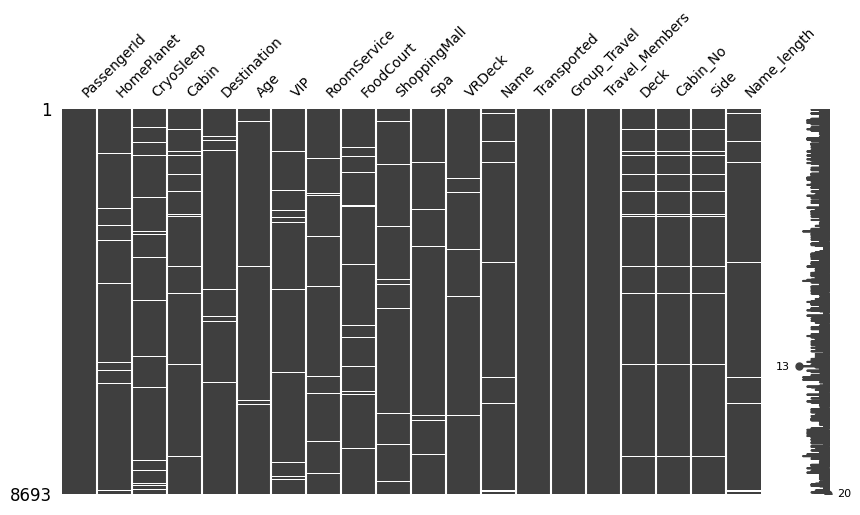

In [ ]:
## We need to include the most insightful plots to this section.

import missingno as msno
# Show missing values:
msno.matrix(train_df,figsize=(10,5),fontsize=10)
#msno.matrix(test,figsize=(10,5),fontsize=10)

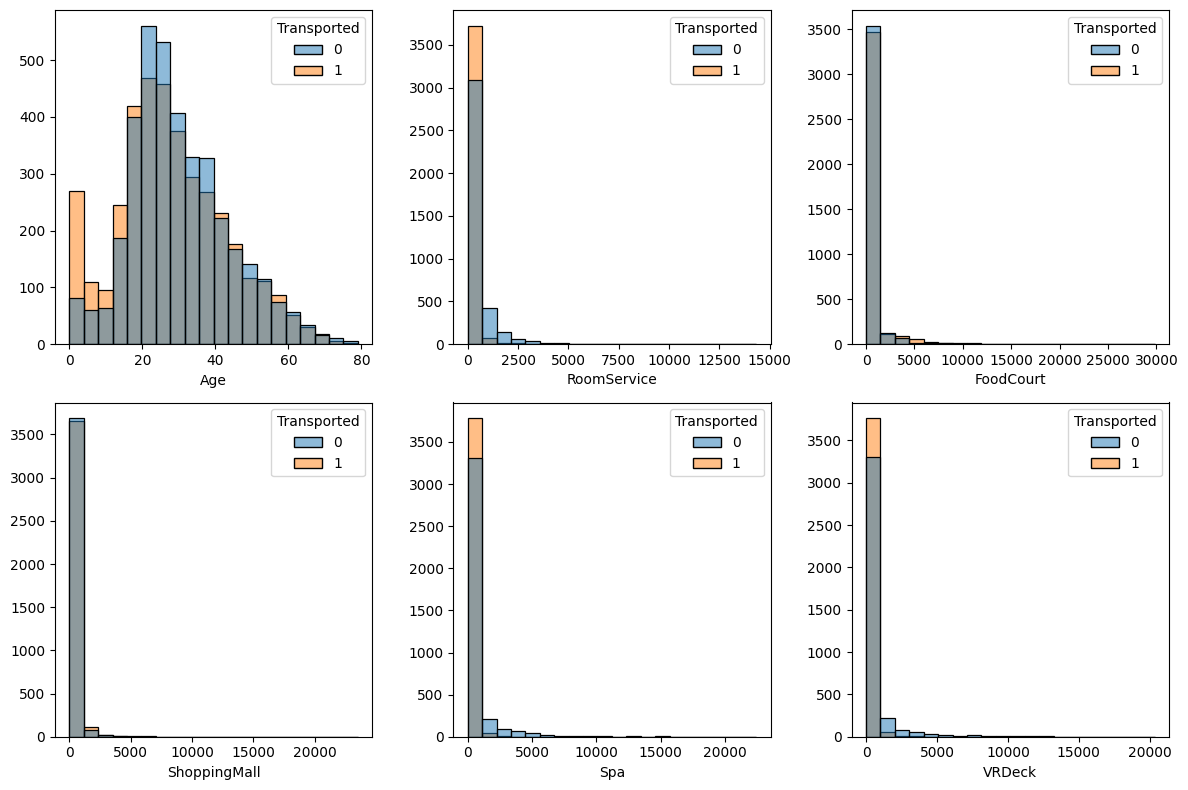


Correlation heatmap:


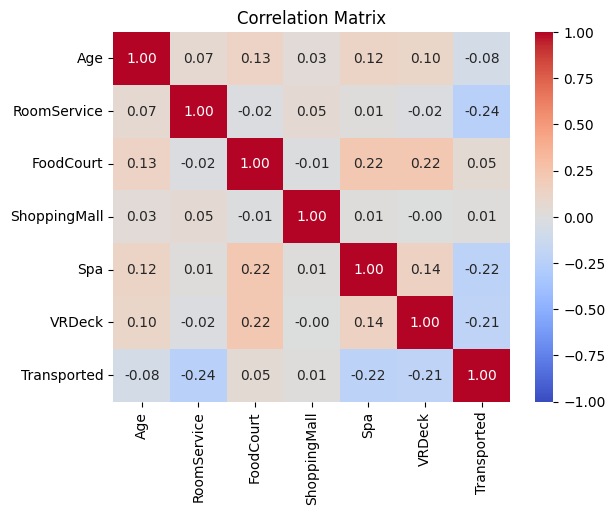

In [ ]:
#Continuous feature distributions(histograms) and their correlations

# Dataframe with continuous features for visualisation purposes
CF = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].dropna().astype(int)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
sns.histplot(x='Age', data=CF, hue='Transported', bins=20, ax=axs[0,0])
sns.histplot(x='RoomService', data=CF, hue='Transported', bins=20, ax=axs[0,1])
sns.histplot(x='FoodCourt', data=CF, hue='Transported', bins=20, ax=axs[0,2])
sns.histplot(x='ShoppingMall', data=CF, hue='Transported', bins=20, ax=axs[1,0])
sns.histplot(x='Spa', data=CF, hue='Transported', bins=20, ax=axs[1,1])
sns.histplot(x='VRDeck', data=CF, hue='Transported', bins=20, ax=axs[1,2])
axs[0, 0].set(ylabel='')
axs[0, 1].set(ylabel='')
axs[0, 2].set(ylabel='')
axs[1, 0].set(ylabel='')
axs[1, 1].set(ylabel='')
axs[1, 2].set(ylabel='')
plt.tight_layout()
plt.show()

# Obtaining the correlation matrix of the continuous features
correlation_matrix = CF.corr()
# Generate a heatmap
print("\nCorrelation heatmap:")
plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

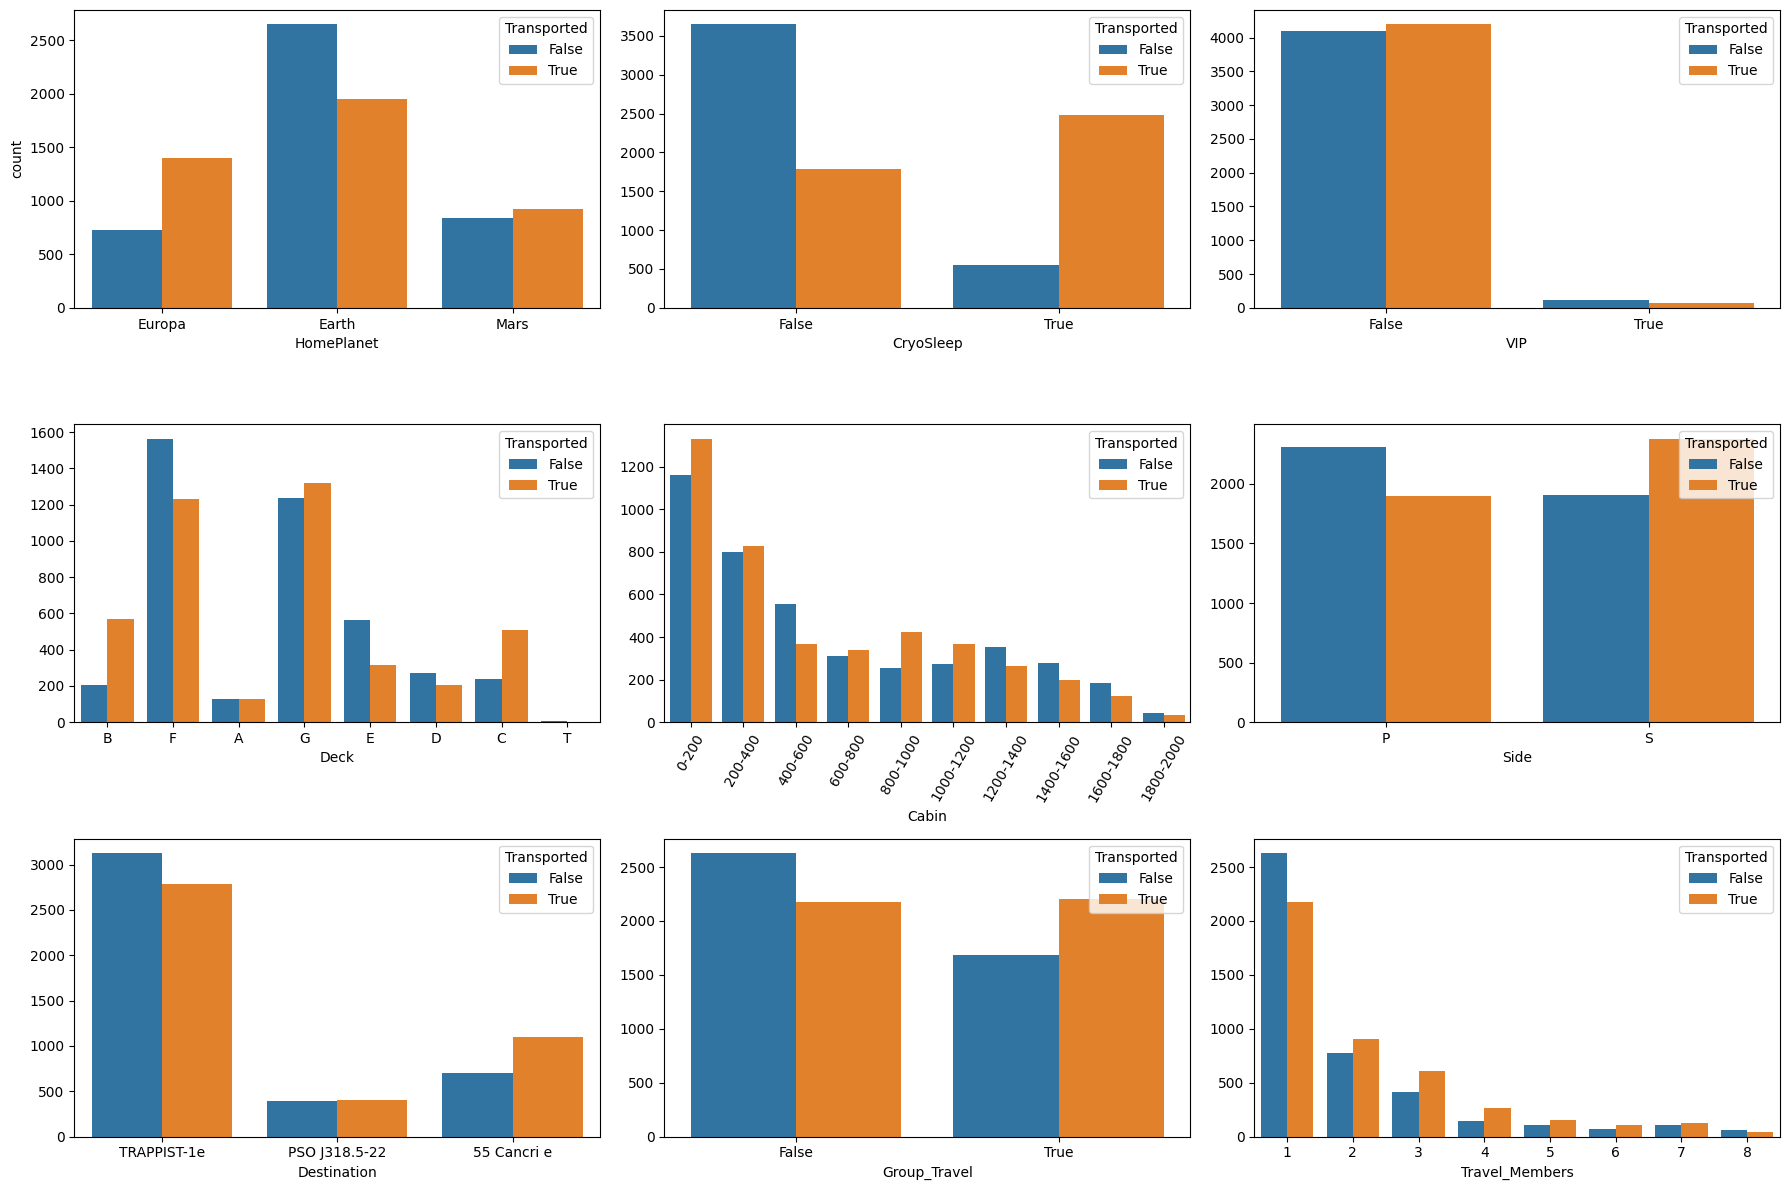

In [ ]:
#Categorial feature plots

CatF=train_df[['HomePlanet', 'CryoSleep',  'VIP', 'Deck', 'Side', 'Destination', 'Group_Travel', 'Travel_Members', 'Transported']]

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
sns.countplot(x='HomePlanet', data=CatF, hue='Transported', ax=axs[0, 0])
sns.countplot(x='CryoSleep', data=CatF, hue='Transported', ax=axs[0, 1])
sns.countplot(x='VIP', data=CatF, hue='Transported', ax=axs[0, 2])
sns.countplot(x='Deck', data=CatF, hue='Transported', ax=axs[1, 0])
sns.countplot(x='Side', data=CatF, hue='Transported', ax=axs[1, 2])
sns.countplot(x='Destination', data=CatF, hue='Transported', ax=axs[2, 0])
sns.countplot(x='Group_Travel', data=CatF, hue='Transported', ax=axs[2, 1])
sns.countplot(x='Travel_Members', data=CatF, hue='Transported', ax=axs[2, 2])

# Visualising 'Cabin_No' as a categorical feature
temp_df = train_df.copy()
temp_df['Cabin_No'] = pd.to_numeric(temp_df['Cabin_No'])
# Define the bins
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000']
#Using pd.cut to categorize the data
temp_df['Cabin'] = pd.cut(temp_df['Cabin_No'], bins=bins, labels=labels, right=False)

sns.countplot(x='Cabin', data=temp_df, hue='Transported',  ax=axs[1, 1])
# Rotate the x-axis tick labels
for tick in axs[1, 1].get_xticklabels():
    tick.set_rotation(60)

#axs[0, 0].set(ylabel='')
axs[0, 1].set(ylabel='')
axs[0, 2].set(ylabel='')
axs[1, 0].set(ylabel='')
axs[1, 1].set(ylabel='')
axs[1, 2].set(ylabel='')
axs[2, 0].set(ylabel='')
axs[2, 1].set(ylabel='')
axs[2, 2].set(ylabel='')

plt.tight_layout()
plt.show()


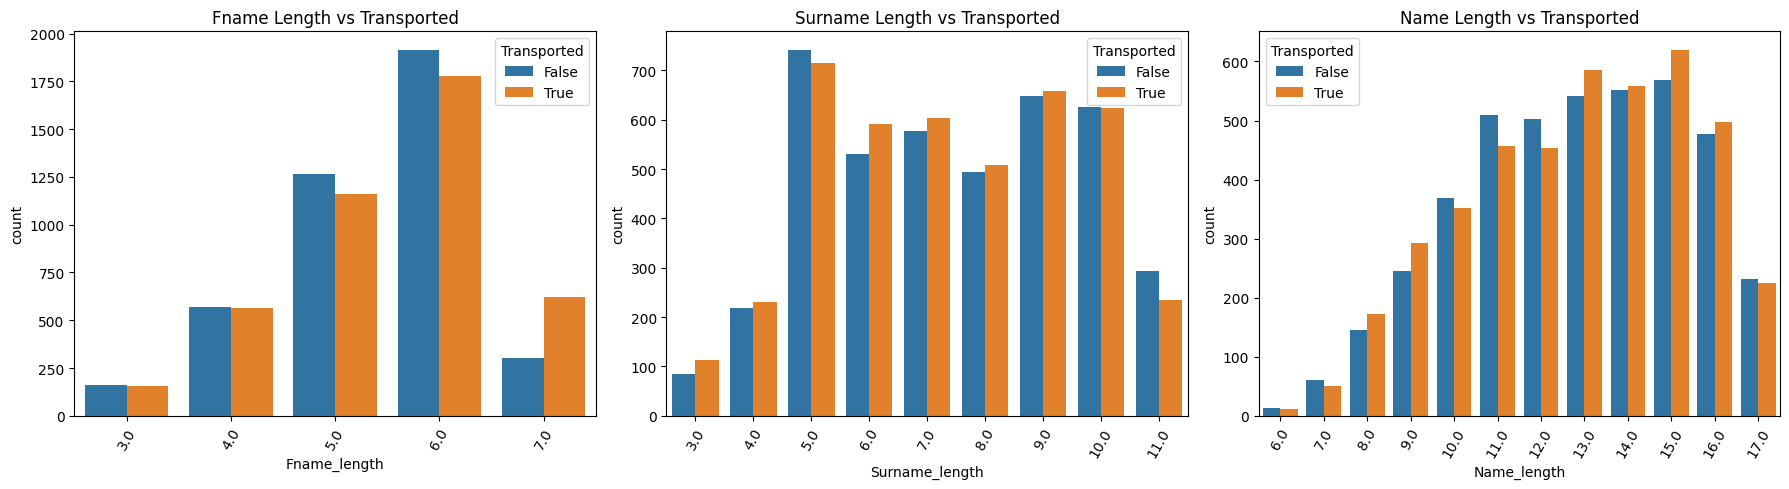

In [ ]:
# Name_Length feature analysis:

temp_df[['Fname', 'Surname']] = temp_df['Name'].str.split(" ", expand=True)
temp_df['Fname_length'] = temp_df['Fname'].str.len()
temp_df['Surname_length'] = temp_df['Surname'].str.len()
temp_df['Name_length'] = temp_df['Fname'].str.len() + temp_df['Surname'].str.len()

# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# First subplot: countplot for 'Fname_length'
sns.countplot(x='Fname_length', data=temp_df, hue='Transported', ax=axs[0])
axs[0].set_title('Fname Length vs Transported')
axs[0].tick_params(axis='x', rotation=60)  # Rotate x-axis labels

# Second subplot: countplot for 'Surname_length'
sns.countplot(x='Surname_length', data=temp_df, hue='Transported', ax=axs[1])
axs[1].set_title('Surname Length vs Transported')
axs[1].tick_params(axis='x', rotation=60)  # Rotate x-axis labels

# Third subplot: countplot for 'Name_length'
sns.countplot(x='Name_length', data=temp_df, hue='Transported', ax=axs[2])
axs[2].set_title('Name Length vs Transported')
axs[2].tick_params(axis='x', rotation=60)  # Rotate x-axis labels

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

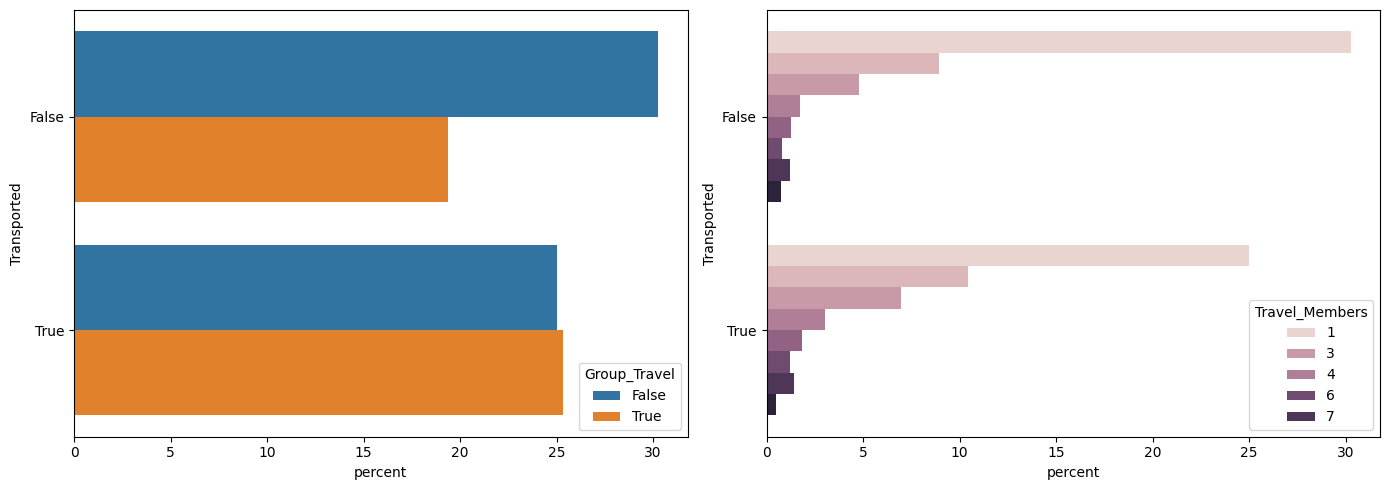

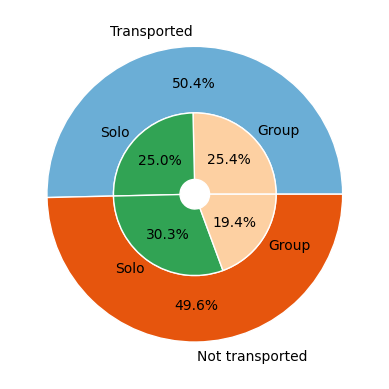

In [ ]:
#'Transportation' and 'Group_Travel'

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(y='Transported', data=train_df, hue='Group_Travel',ax=axs[0], stat='percent')
sns.countplot(y='Transported', data=train_df, hue='Travel_Members', ax=axs[1], stat='percent')
plt.tight_layout()
plt.show()

# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,8,7])   # TFFT   #cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts all the people travelling in the spaceship
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Transported', 'Not transported']
     #[df_tot.index[0],df_tot.index[1]]  #[True, False]
);

# Counts of passengers got transported, by Group_Travel
df_tr = train_df.Group_Travel[train_df['Transported']==True].value_counts()

# Counts of passengers not got transported, by Group_Travel
df_ntr = train_df.Group_Travel[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_tr_by_grouptravel= np.concatenate((np.array(df_tr),np.array(df_ntr)))

# Inner pie chart (to show sub-distribution of "Sex")
ax.pie(
    df_tr_by_grouptravel,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Group','Solo','Solo', 'Group']
     #[df_tr.index[0],df_tr.index[1],df_ntr.index[0],df_ntr.index[1]]  # True, False, False, True
);

In [ ]:
# Tree maps
import plotly.express as px
# For visualisation purposes
DF = train_df.copy()
DF.dropna(inplace=True)
DF['Age'] = DF['Age'].astype(int)
DF['Transported'] = DF['Transported'].astype(int)

fig = px.treemap(DF, path=['Transported','Group_Travel','HomePlanet'], color='Age')
fig.show()

fig = px.treemap(DF, path=['Transported','HomePlanet'], color='Age')
fig.show()

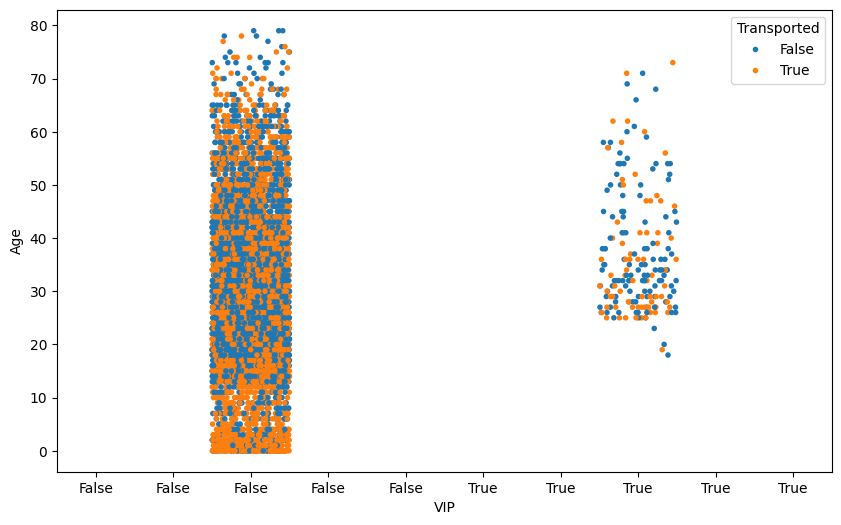

In [ ]:
# Swam plot related to the tree map

fig, axs = plt.subplots(figsize=(10, 6))
sns.stripplot(x='VIP', y='Age', hue='Transported', data=train_df, size=4);

# Adjust the frequency of the ticks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.show()

## 1.3 Data Pre-processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer

# Install eli5
!pip install eli5

# Install H2O
!pip install h2o

train_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/train.csv"
test_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/test.csv"

import warnings
warnings.filterwarnings("ignore")

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=564034debfec5fe8ceb79a5f0faeeb4c59c869cb359b68a9f2d0e32a02d12018
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.4-py2.py3-none-any.whl size=265375577 sha256=f2fcfb61c21f8db062d422cd2c15186ffa1beb769196a59c172c68e71cfa0a8d
  Stored in directory: /root/.cache/pip/wheels/4d/a6/47/8bfeb1026fd65cb8630beb74d8e3bec844f572cf4f336fdd56
Successfully built h2o


In [ ]:
def processing(df, flag):

  print(f'--------------- Processing {flag} data -----------------')
  # Visualising missing values in the data
  msno.matrix(df,figsize=(10,5),fontsize=10)

  # Obtaining 'Group_Travel' and 'Travel_Memebrs' features from 'Group_ID'
  df['GroupId'] = df['PassengerId'].str.split('_').str[0]
  df['GroupId'] = pd.to_numeric(df['GroupId'])
  df['MemberId'] = df['PassengerId'].str.split('_').str[1]
  df['MemberId'] = pd.to_numeric(df['MemberId'])
  df1= df.groupby('GroupId')['MemberId'].agg('count').reset_index()  # Coverting dataframe
  df1.rename(columns={'MemberId': 'Member_Count'}, inplace=True)
  df1['Group_travel'] = (df1['Member_Count']>1).astype(int)
  Groups = df1[df1['Group_travel'] == 1]['GroupId'] #.reset_index()
  Groups = set(Groups) # Convert Groups to a set
  # Obtaining actual groups IDs with more one person.
  df['Group_Travel'] = df['GroupId'].isin(Groups)
  # Merges the dataframes on GroupId, with a left join ensuring all rows from df are kept.
  df2 = pd.merge(df, df1[['GroupId','Member_Count']], on='GroupId', how='left')

  # Rename the Member_Count column to travel_members
  df2.rename(columns={'Member_Count': 'Travel_Members'}, inplace=True)

  # Obtaining Deck, Cabin_No and Side from 'Cabin' feature
  df2[["Deck", "Cabin_No", "Side"]] = df2["Cabin"].str.split("/", expand=True)

  # Obtaining first name and surname from Name feature
  df2[['Fname', 'Surname']] = df2['Name'].str.split(" ", expand=True)
  df2['Name_length'] = df2['Fname'].str.len() + df2['Surname'].str.len()
  df2.drop(['Fname','Surname'], axis=1, inplace = True)

  df2.drop(['Name','GroupId','MemberId','Cabin'], axis=1, inplace = True)
  df2['Index'] = np.arange(df2.shape[0])
  msno.matrix(df2,figsize=(10,5),fontsize=10)
  return df2

### 1.3.1 Initial Training and Test Data Processing

--------------- Processing Training data -----------------
--------------- Processing Testing data -----------------


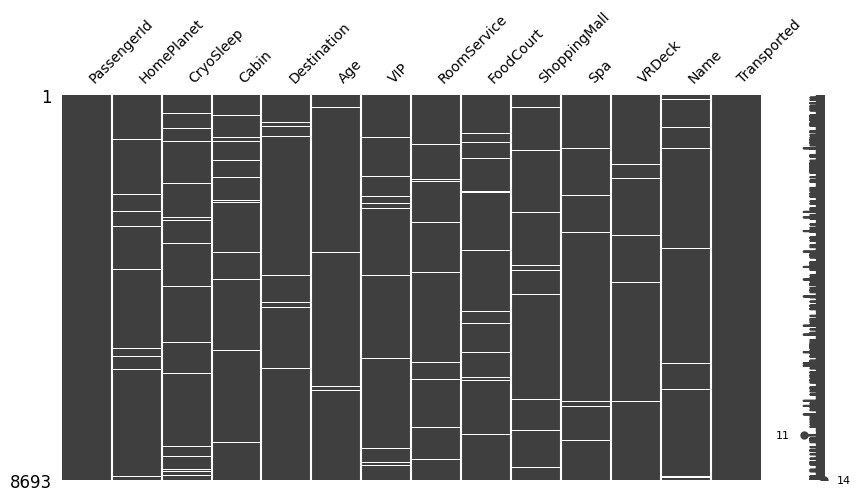

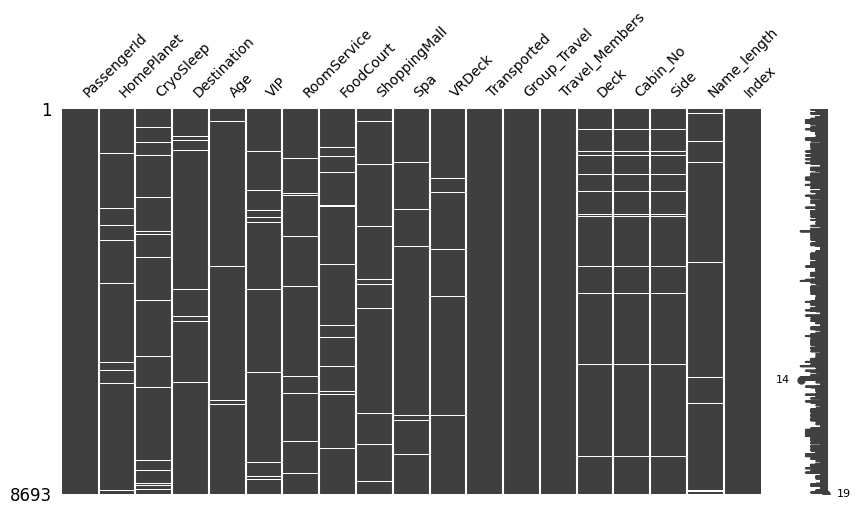

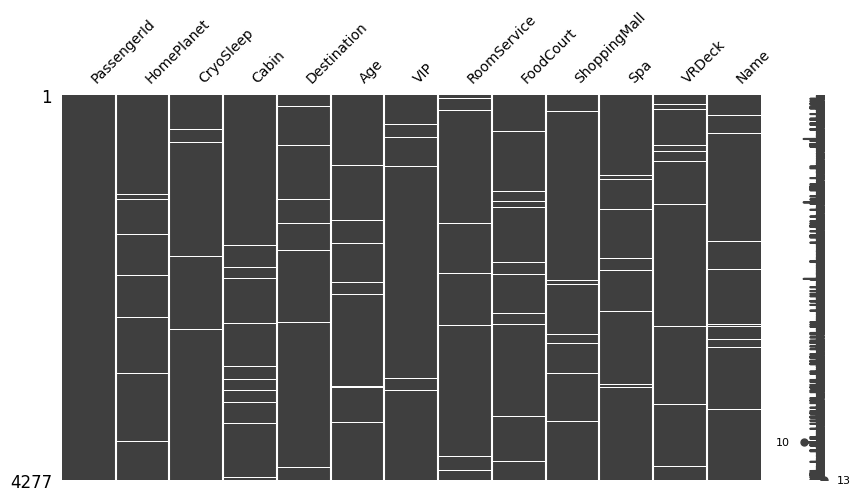

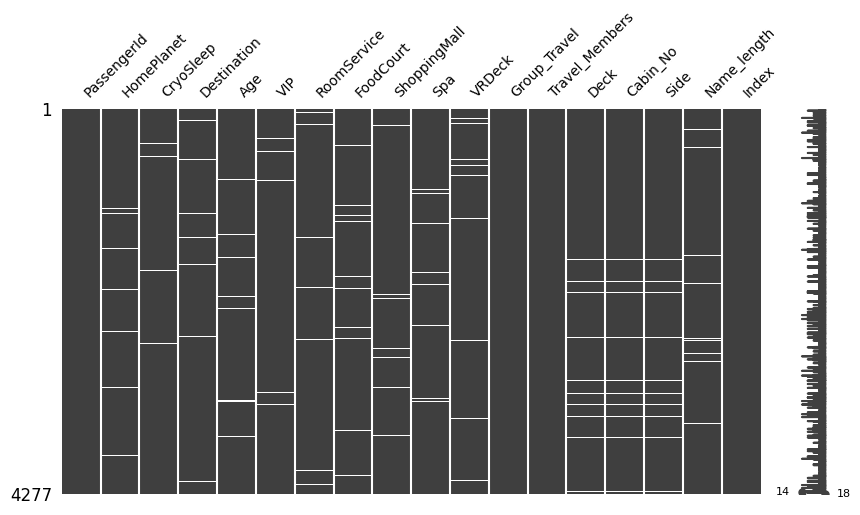

In [ ]:
train_df = processing(train_data, 'Training')
test_df = processing(test_data, 'Testing')

# Below plots appear in the following order.
# i) Missing values in original train data
# ii) Missing values in the original train data with other features extracted
# iii) Missing values in original test data
# iv) Missing values in the original test data with other features extracted

### 1.3.2 Data Imputation

In [ ]:
from sklearn.impute import SimpleImputer

def imputing_data(df2):
  #Visualising missing values
  #msno.matrix(df2,figsize=(10,5),fontsize=10)

  # Impute missing values of the categorical features
  Categories=df2.select_dtypes(include=['object']).columns
  imputer = SimpleImputer(strategy='most_frequent')
  df2[Categories] = imputer.fit_transform(df2[Categories])
  #msno.matrix(df2,figsize=(10,5),fontsize=10)

  # Impute missing values of the numerical features
  Num_Features=df2.select_dtypes(include=['float']).columns
  for num_feature in Num_Features:
    #df2[num_feature].fillna(df2[num_feature].mode()[0], inplace=True)
    df2[num_feature].fillna(df2[num_feature].median(), inplace=True)
  #msno.matrix(df2,figsize=(10,5),fontsize=10)
  return df2



### 1.3.3 Transforming numerical features and standard scaling

In [ ]:
def feature_transforms(df2):
  # Transform skewed features
  skewed_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  for feature in skewed_features:
    df2[feature] = np.log1p(df2[feature])  # log1p is used to handle zero values in the data

  # Normalize the numerical features
  def normalise_feature(var):
      var_min = np.min(var)
      var_max = np.max(var)
      normalised_var = (var - var_min) / (var_max - var_min)
      return normalised_var

  features_to_scale = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  for feature in features_to_scale:
    df2[feature]=normalise_feature(df2[feature])

  #Converting Cabin_No to a catogorical feature with limited categories
  df2['Cabin_No'] = pd.to_numeric(df2['Cabin_No'])
  # Define the bins
  #bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
  #labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000']

  #Using pd.cut to categorize the data
  #df2['Cabin'] = pd.cut(df2['Cabin_No'], bins=bins, labels=labels, right=False)  #Cabin_Category
  #df2.drop(['Cabin_No'], axis=1, inplace = True)

  return df2

### 1.3.4 Feature Encoding

In [ ]:
def feature_encoding(df2):
  # Binary encoding of features with binary output
  df2['VIP'] = df2['VIP'].astype(int)
  df2['CryoSleep'] = df2['CryoSleep'].astype(int)

  # Feature Encoding
  encoded_df = pd.get_dummies(df2, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], dummy_na=False)

  # bool to int
  binary_features=encoded_df.select_dtypes(include=['bool']).columns
  for feature in binary_features:
    encoded_df[feature] = encoded_df[feature].astype(int)

  return encoded_df

### 1.3.5 Applying the above pre-processing functions on train data

In [ ]:
# Complete processing of train data

# We subset the train data based on combinations of HomePlanet and Destination
# features to effectively use mode and median for missing value imputation for
# categorical and numerical features respectively.


Earth_des_A = train_df[(train_df['HomePlanet']=='Earth') & (train_df['Destination']=='55 Cancri e')]    #690
Earth_des_B = train_df[(train_df['HomePlanet']=='Earth') & (train_df['Destination']=='PSO J318.5-22')]  #712
Earth_des_C = train_df[(train_df['HomePlanet']=='Earth') & (train_df['Destination']=='TRAPPIST-1e')]    #3101

Europa_des_A = train_df[(train_df['HomePlanet']=='Europa') & (train_df['Destination']=='55 Cancri e')]    #886
Europa_des_B = train_df[(train_df['HomePlanet']=='Europa') & (train_df['Destination']=='PSO J318.5-22')]  #19
Europa_des_C = train_df[(train_df['HomePlanet']=='Europa') & (train_df['Destination']=='TRAPPIST-1e')]    #1189

Mars_des_A = train_df[(train_df['HomePlanet']=='Mars') & (train_df['Destination']=='55 Cancri e')]    #193
Mars_des_B = train_df[(train_df['HomePlanet']=='Mars') & (train_df['Destination']=='PSO J318.5-22')]  #49
Mars_des_C = train_df[(train_df['HomePlanet']=='Mars') & (train_df['Destination']=='TRAPPIST-1e')]    #1475

Earth_des_A = imputing_data(Earth_des_A)
Earth_des_B = imputing_data(Earth_des_B)
Earth_des_C = imputing_data(Earth_des_C)

Europa_des_A = imputing_data(Europa_des_A)
Europa_des_B = imputing_data(Europa_des_B)
Europa_des_C = imputing_data(Europa_des_C)

Mars_des_A = imputing_data(Mars_des_A)
Mars_des_B = imputing_data(Mars_des_B)
Mars_des_C = imputing_data(Mars_des_C)

other = train_df[(train_df['HomePlanet'].isna()) | (train_df['Destination'].isna())] #379  ----> 8693
DF = pd.concat([Earth_des_A, Earth_des_B, Earth_des_C,
                       Europa_des_A, Europa_des_B, Europa_des_C,
                       Mars_des_A, Mars_des_B, Mars_des_C,
                       other])
DF = imputing_data(DF)
DF.isna().sum()

DF.sort_values('Index', inplace=True)
# Extract the PassengerId from here if needed.
DF = feature_transforms(DF)
Train_DF = feature_encoding(DF)
Train_DF.drop(['PassengerId','Index'], axis=1, inplace=True)
Train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   Group_Travel               8693 non-null   int64  
 10  Travel_Members             8693 non-null   int64  
 11  Cabin_No                   8693 non-null   int64  
 12  Name_length                8693 non-null   float64
 13  HomePlanet_Earth           8693 non-null   int64  
 1

In [ ]:
# Checking for the missing values after missing value imputation
Train_DF.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Group_Travel                 0
Travel_Members               0
Cabin_No                     0
Name_length                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64

###1.3.6 Applying the above pre-processing functions on test data

In [ ]:
# Complete processing of test data

# We subset the train data based on combinations of HomePlanet and Destination
# features to effectively use mode and median for missing value imputation for
# categorical and numerical features respectively.

Earth_des_A = test_df[(test_df['HomePlanet']=='Earth') & (test_df['Destination']=='55 Cancri e')]
Earth_des_B = test_df[(test_df['HomePlanet']=='Earth') & (test_df['Destination']=='PSO J318.5-22')]
Earth_des_C = test_df[(test_df['HomePlanet']=='Earth') & (test_df['Destination']=='TRAPPIST-1e')]

Europa_des_A = test_df[(test_df['HomePlanet']=='Europa') & (test_df['Destination']=='55 Cancri e')]
Europa_des_B = test_df[(test_df['HomePlanet']=='Europa') & (test_df['Destination']=='PSO J318.5-22')]
Europa_des_C = test_df[(test_df['HomePlanet']=='Europa') & (test_df['Destination']=='TRAPPIST-1e')]

Mars_des_A = test_df[(test_df['HomePlanet']=='Mars') & (test_df['Destination']=='55 Cancri e')]
Mars_des_B = test_df[(test_df['HomePlanet']=='Mars') & (test_df['Destination']=='PSO J318.5-22')]
Mars_des_C = test_df[(test_df['HomePlanet']=='Mars') & (test_df['Destination']=='TRAPPIST-1e')]

Earth_des_A = imputing_data(Earth_des_A)
Earth_des_B = imputing_data(Earth_des_B)
Earth_des_C = imputing_data(Earth_des_C)

Europa_des_A = imputing_data(Europa_des_A)
Europa_des_B = imputing_data(Europa_des_B)
Europa_des_C = imputing_data(Europa_des_C)

Mars_des_A = imputing_data(Mars_des_A)
Mars_des_B = imputing_data(Mars_des_B)
Mars_des_C = imputing_data(Mars_des_C)

other = test_df[(test_df['HomePlanet'].isna()) | (test_df['Destination'].isna())]
DF = pd.concat([Earth_des_A, Earth_des_B, Earth_des_C,
                       Europa_des_A, Europa_des_B, Europa_des_C,
                       Mars_des_A, Mars_des_B, Mars_des_C,
                       other])
DF = imputing_data(DF)
DF.isna().sum()

DF.sort_values('Index', inplace=True)
# Extract the PassengerId from here if needed.
DF = feature_transforms(DF)
Test_DF = feature_encoding(DF)
Test_DF.drop(['PassengerId','Index'], axis=1, inplace=True)
Test_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0 to 4276
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   int64  
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   Group_Travel               4277 non-null   int64  
 9   Travel_Members             4277 non-null   int64  
 10  Cabin_No                   4277 non-null   int64  
 11  Name_length                4277 non-null   float64
 12  HomePlanet_Earth           4277 non-null   int64  
 13  HomePlanet_Europa          4277 non-null   int64  
 1

In [ ]:
# Checking for the missing values after missing value imputation
Test_DF.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Group_Travel                 0
Travel_Members               0
Cabin_No                     0
Name_length                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64

## 1.4 Modelling

In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster locally
h2o.init()
response = "Transported"
predictors = list(Train_DF.drop('Transported', axis=1).columns)
Train_DF['Transported'] = Train_DF['Transported'].astype('bool')

# Convert from a pandas dataframe to an h20 dataframe
hf = h2o.H2OFrame(Train_DF)

aml = H2OAutoML(max_models=20, max_runtime_secs=300, seed=1, include_algos= ["GLM", "DRF", "XGBoost", "GBM", "DeepLearning", "StackedEnsemble"])
# Train the model
aml.train(x=predictors, y=response, training_frame=hf)
leaderboard = aml.leaderboard.as_data_frame()
best_model_id = leaderboard['model_id'].iloc[0]
best_model = h2o.get_model(best_model_id)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxr8k0saz
  JVM stdout: /tmp/tmpxr8k0saz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxr8k0saz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         10 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.4
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_unknownUser_oznkcn
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
# Display leaderboard
leaderboard

model_id       auc   logloss  \
0                    GBM_1_AutoML_1_20240712_214606  0.901835  0.387339   
1                    GBM_2_AutoML_1_20240712_214606  0.900172  0.390599   
2       GBM_grid_1_AutoML_1_20240712_214606_model_2  0.899641  0.394187   
3                    GBM_5_AutoML_1_20240712_214606  0.899263  0.392236   
4                    GBM_3_AutoML_1_20240712_214606  0.897876  0.395159   
5                XGBoost_3_AutoML_1_20240712_214606  0.897214  0.396161   
6                    GBM_4_AutoML_1_20240712_214606  0.896768  0.398530   
7   XGBoost_grid_1_AutoML_1_20240712_214606_model_3  0.896107  0.397764   
8   XGBoost_grid_1_AutoML_1_20240712_214606_model_2  0.896038  0.401661   
9   XGBoost_grid_1_AutoML_1_20240712_214606_model_1  0.892827  0.406706   
10      GBM_grid_1_AutoML_1_20240712_214606_model_1  0.891833  0.408700   
11               XGBoost_1_AutoML_1_20240712_214606  0.891389  0.410458   
12               XGBoost_2_AutoML_1_20240712_214606  0.889239  0.417293   
13                   DRF_1_AutoML_1_20240712_214606  0.885814  0.447165   
14                   XRT_1_AutoML_1_20240712_214606  0.871680  0.480692   
15          DeepLearning_1_AutoML_1_20240712_214606  0.861486  0.463186   
16                   GLM_1_AutoML_1_20240712_214606  0.852149  0.479775   

       aucpr  mean_per_class_error      rmse       mse  
0   0.914346              0.186739  0.354416  0.125611  
1   0.912347              0.198382  0.355951  0.126701  
2   0.911008              0.199055  0.356816  0.127317  
3   0.910621              0.198208  0.356581  0.127150  
4   0.911176              0.192927  0.358172  0.128287  
5   0.910649              0.199548  0.358970  0.128859  
6   0.909794              0.201216  0.360019  0.129613  
7   0.909016              0.200616  0.360279  0.129801  
8   0.910067              0.204782  0.361725  0.130845  
9   0.906887              0.204892  0.363847  0.132385  
10  0.905721              0.202637  0.364584  0.132922  
11  0.906123              0.209018  0.365407  0.133522  
12  0.905726              0.207991  0.368472  0.135772  
13  0.899941              0.203805  0.368641  0.135896  
14  0.883291              0.206763  0.392407  0.153983  
15  0.878279              0.232510  0.390579  0.152552  
16  0.870280              0.228972  0.395205  0.156187

### 1.4.1 Best model details

In [ ]:
print(best_model_id)

GBM_1_AutoML_1_20240712_214606


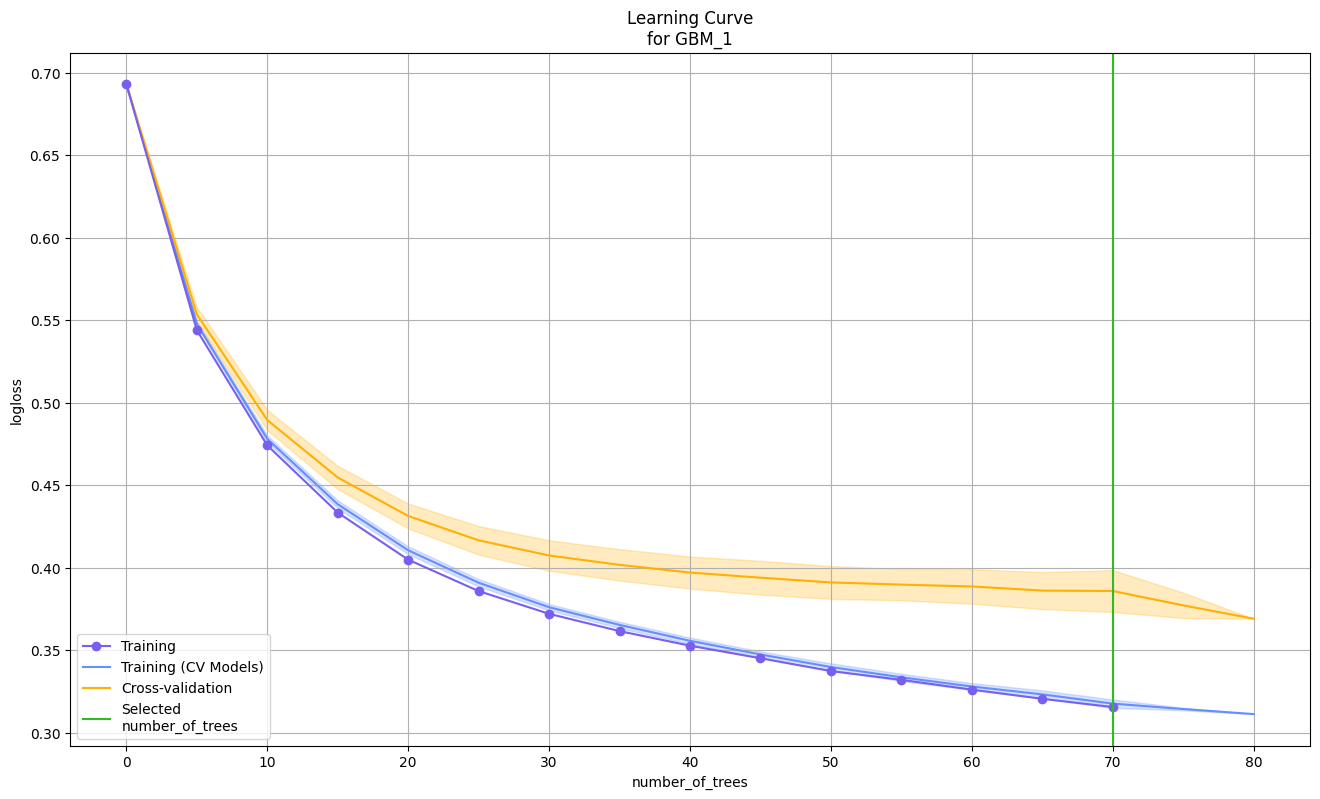

In [ ]:
learning_curve_plot = best_model.learning_curve_plot()

## 1.5 Analysis & XAI
Here, we make plots illustrating the efficiency, etc, of the model, and apply XAI methods to understand which features are most important in predicting the target variable.

<Figure size 400x500 with 0 Axes>

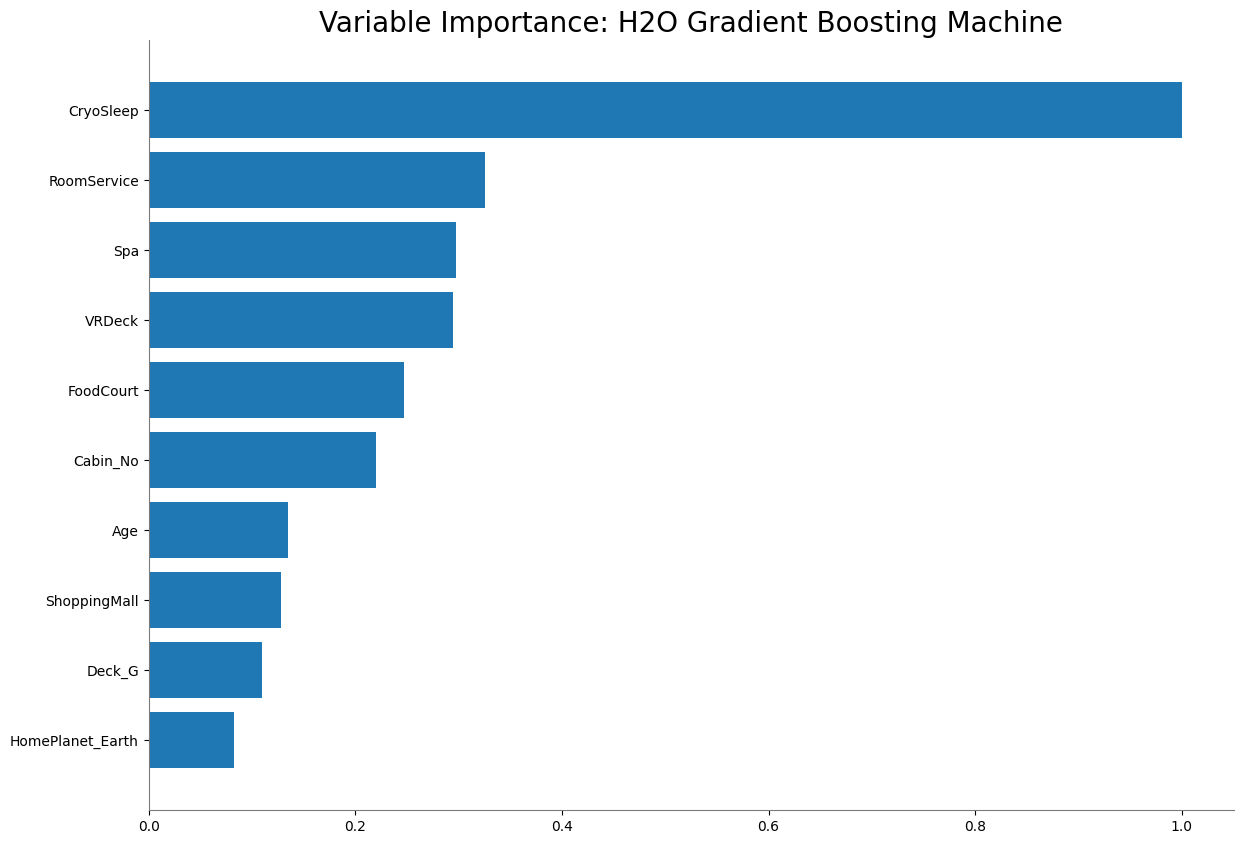

<Figure size 640x480 with 0 Axes>

In [ ]:
# Variable importance plot
plt.figure(figsize=(4, 5))
best_model.varimp_plot()
plt.tight_layout()

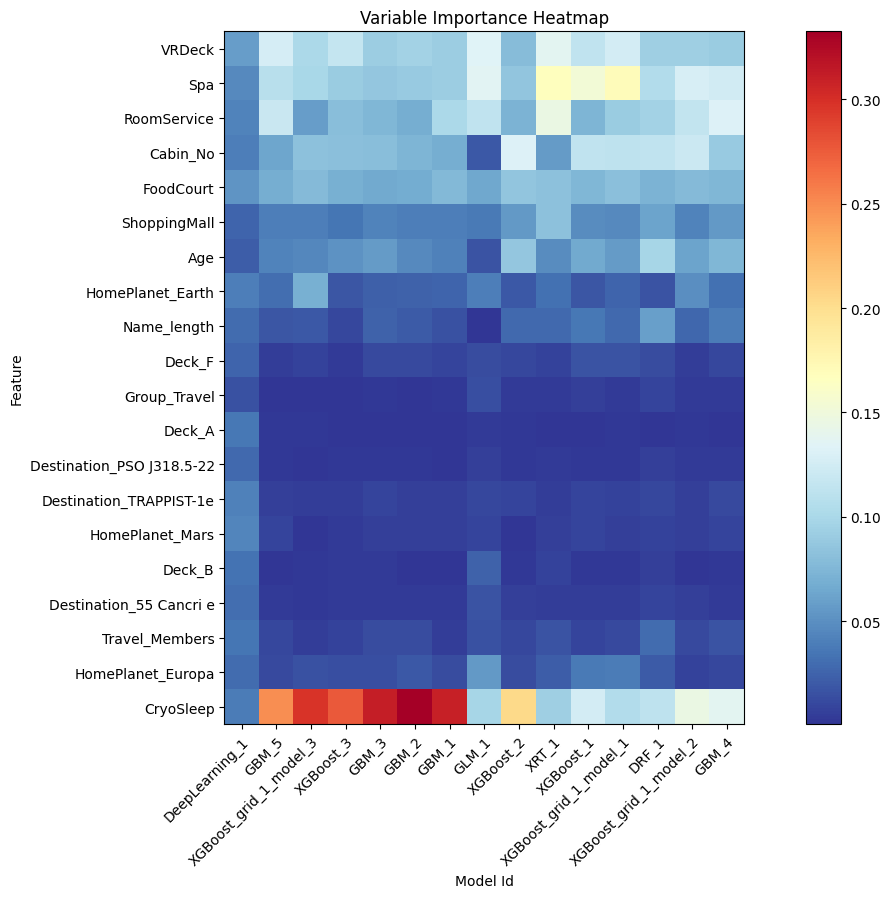

In [ ]:
# Variable importance heatmap
va_plot = aml.varimp_heatmap()

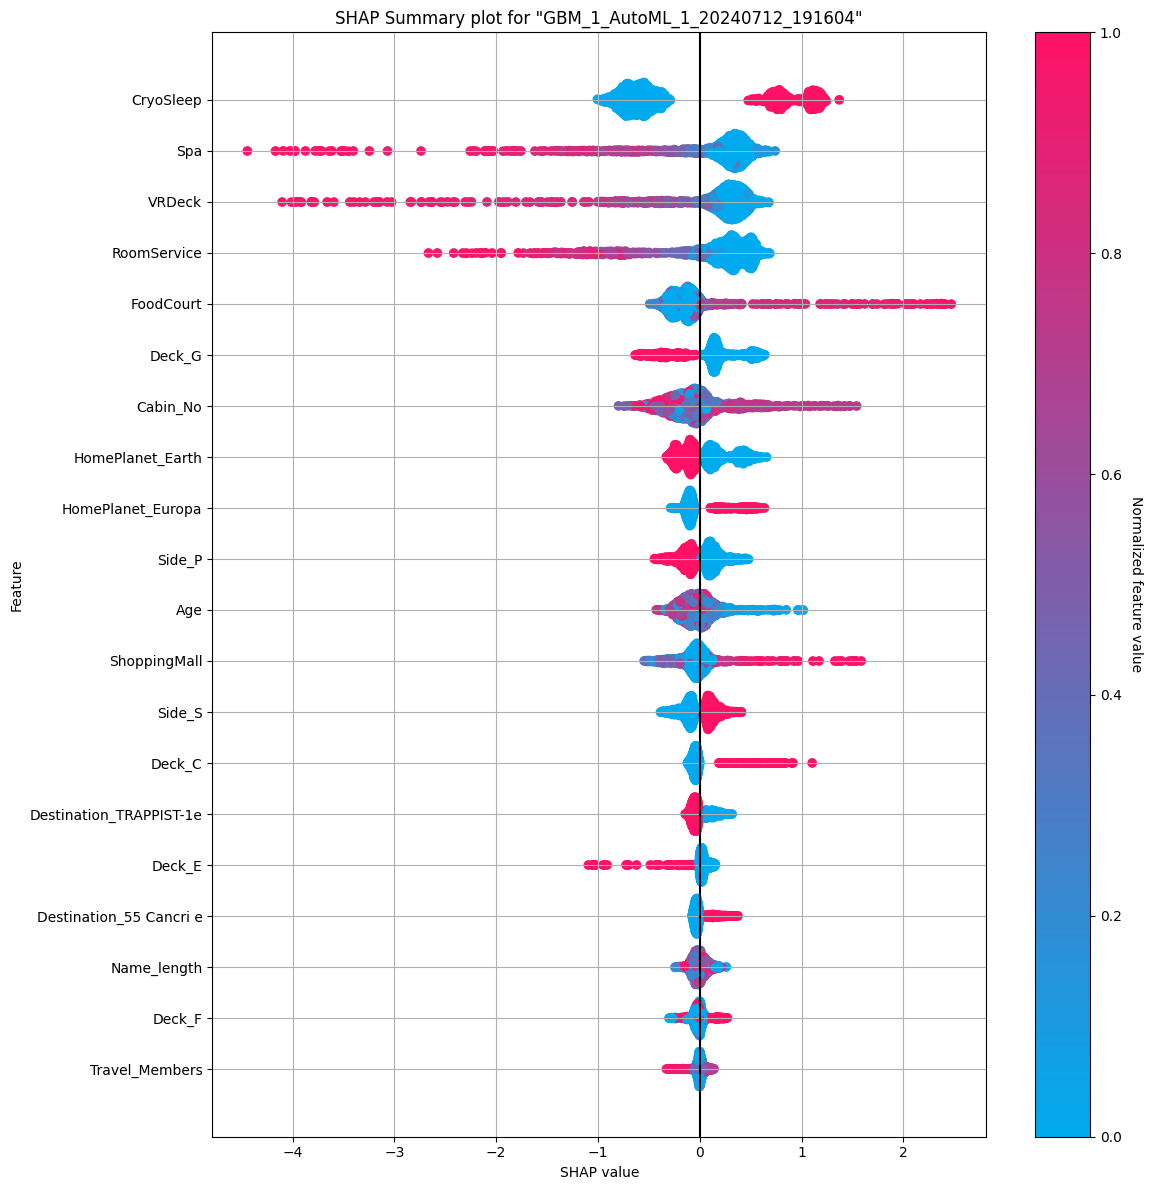

In [ ]:
# SHAP Summary is used here to understand how the model interprets the data
# it was trained on

shap_plot = best_model.shap_summary_plot(hf)  #(shapley values)

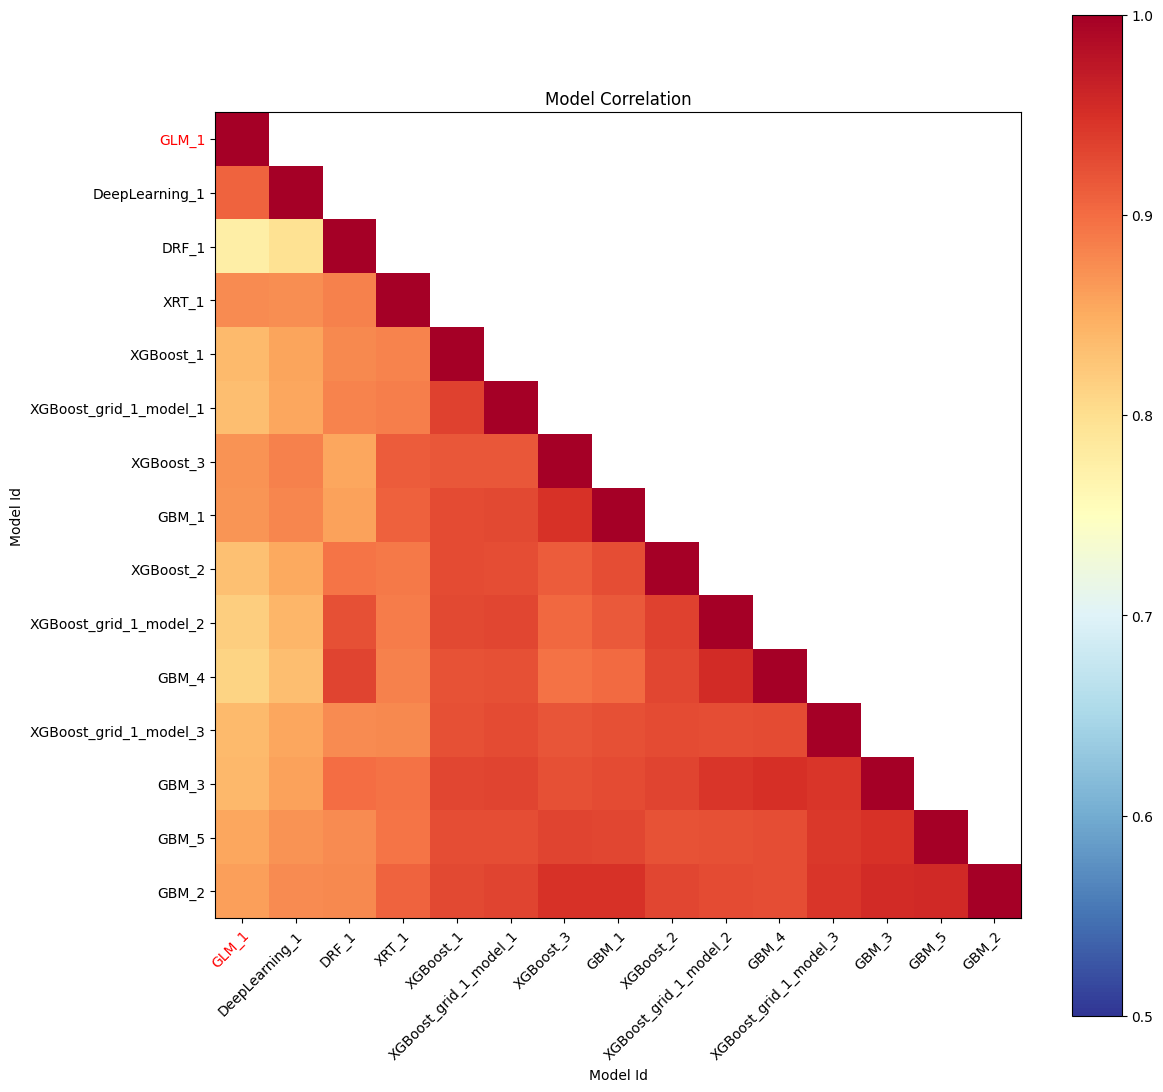

In [ ]:
# Model correlation matrix
mc_plot = aml.model_correlation_heatmap(hf)

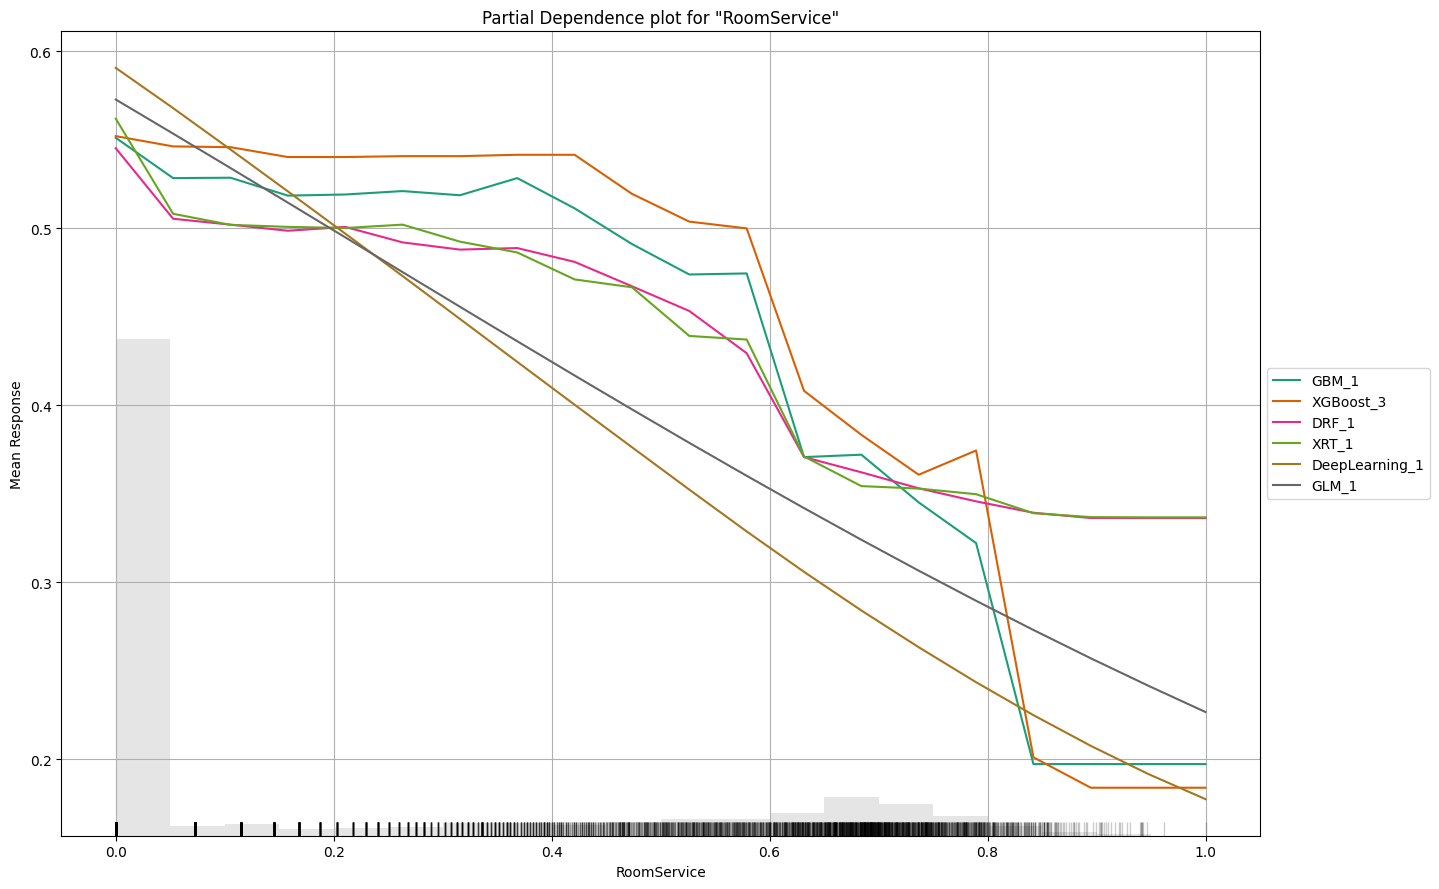

In [ ]:
# Partial Dependence (PD) plot for "RoomService" feature
column="RoomService"
pd_plot = aml.pd_multi_plot(hf, column)

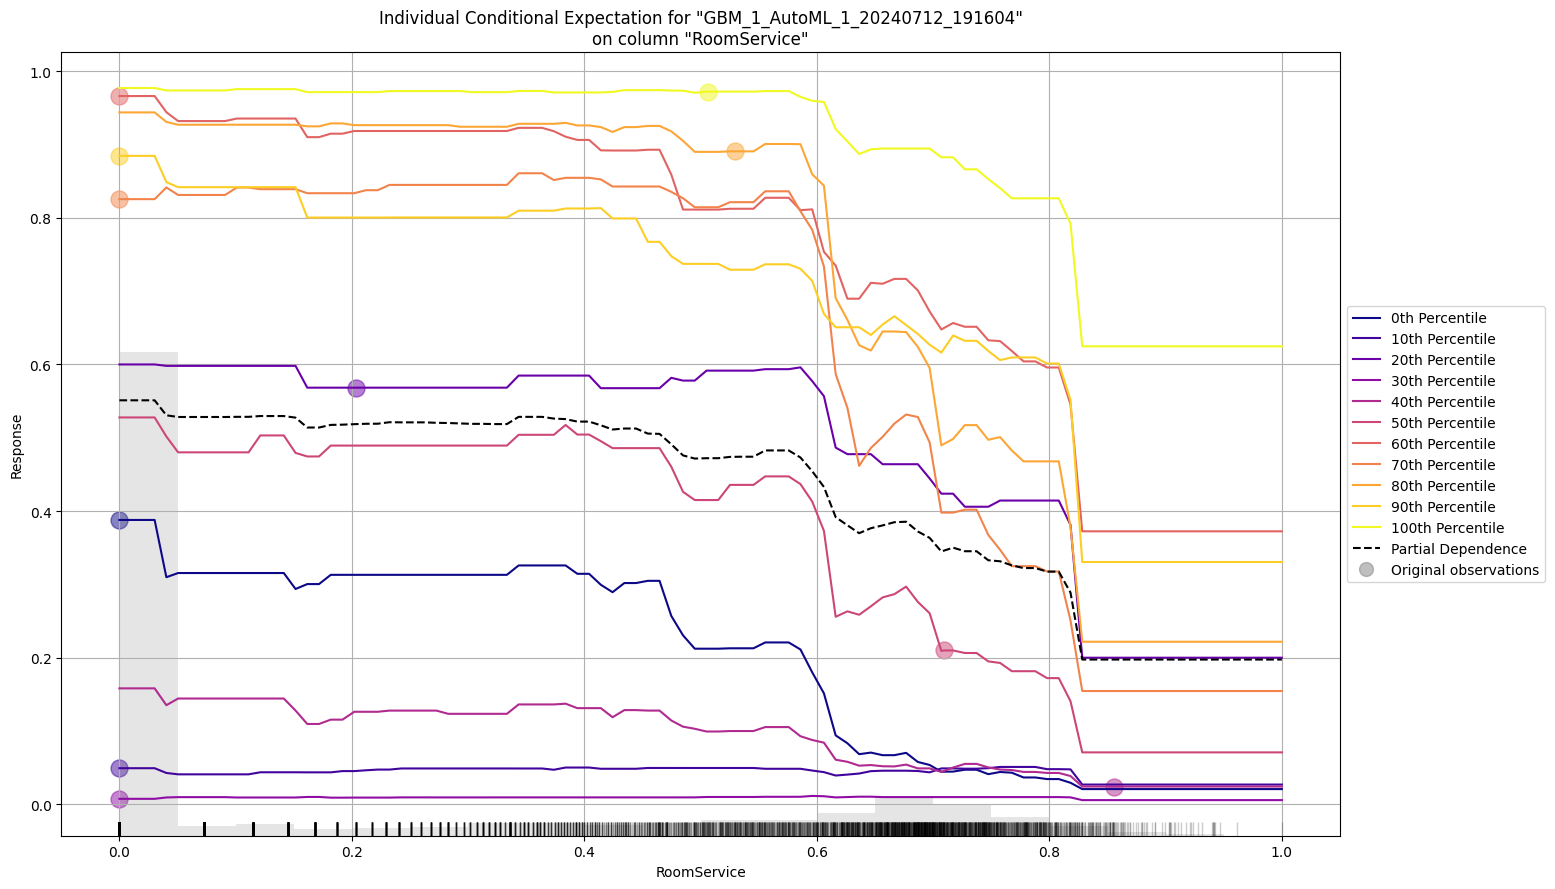

In [ ]:
# ICE (Individual Conditional Expectation) Plot for "RoomService" feature
column="RoomService"
ice_plot = best_model.ice_plot(hf, column)

## 1.6 Prepare predicitons for submission

Here, you can extract the results needed for the submission to Kaggle. This has to be in a certian format.

A basic example code for this is provided below. The .csv file it produces can then be uploaded to Kaggle on the Kaggle Challenge webpage.

In [ ]:
# Make predictions
test_h20= h2o.H2OFrame(Test_DF)
predictions = best_model.predict(test_h20)

predictions['Transported'] = predictions['True'] > 0.5
dframe = predictions[['False', 'True', 'Transported']].as_data_frame()
dframe['Transported'] = dframe['Transported'].astype('bool')

out = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': dframe['Transported']})
out.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

In [ ]:
from google.colab import files
# Write the dataFrame to a .csv file
out.to_csv('results.csv', index=False)
#Download the .csv file
files.download("results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files

# # Prepare the Kaggle submission file
# submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_pred})

# # Convert 0s and 1s to "False" and "True"
# submission.replace({0: False, 1: True}, inplace=True)

# # Write the dataFrame to a .csv file
# submission.to_csv('submission_Test.csv', index=False)

# #Download the .csv file
# files.download("submission_Test.csv")

## 1.7 Experiment: Performance Evaluation
Here, we again try to find the best model trained for 80% train data and use 20% train data for testing. In this way, we can evaluate our own model performance.

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

response = "Transported"
predictors = list(Train_DF.drop('Transported', axis=1).columns)
Train_DF['Transported'] = Train_DF['Transported'].astype('bool')

# Convert from a pandas dataframe to an h20 dataframe
hframe = h2o.H2OFrame(Train_DF)

# Obtaining the training and testing split
train, test = hframe.split_frame(seed=1, ratios=[0.80])  #80:20 split

aml = H2OAutoML(max_models=20, max_runtime_secs=300, seed=1, include_algos= ["GLM", "DRF", "XGBoost", "GBM", "DeepLearning", "StackedEnsemble"])
# Train the model
aml.train(x=predictors, y=response, training_frame=train)
leaderboard = aml.leaderboard.as_data_frame()
best_model_id = leaderboard['model_id'].iloc[0]
best_model = h2o.get_model(best_model_id)

print(f'Best Model: {best_model}')


from sklearn.metrics import accuracy_score, classification_report  # Import other metrics as needed

# Evaluate on our test set  (20% of original train data)
pred = best_model.predict(test)
pred = pred.as_data_frame()['predict'].values  # Convert to numpy array or list
actuals = test[response].as_data_frame().values.flatten()  # Convert actuals to numpy array or list

# Example of classification metrics
accuracy = accuracy_score(actuals, pred)
report = classification_report(actuals, pred)

print(f"Accuracy on test set: {accuracy}")
print(f"Classification report:\n{report}")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         26 mins 34 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.4
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_unknownUser_9hyfwx
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.148 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Best Model: Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_2_20240712_194232


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    66                 66                          38643                  8            15           12.7727       30            46            41.4091

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10005494063090277
RMSE: 0.31631462285342227
LogLoss: 0.3193688994438345
Mean Per-Class Error: 0.14452164728695088
AUC: 0.9414884174750499
AUCP

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%
Accuracy on test set: 0.8082510168506682
Classification report:
              precision    recall  f1-score   support

       False       0.83      0.78      0.80       862
        True       0.79      0.84      0.81       859

    accuracy                           0.81      1721
   macro avg       0.81      0.81      0.81      1721
weighted avg       0.81      0.81      0.81      1721



/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


# Section 2: Initial Work
<font color='blue'> Let's do our initial work here. We'll explore this dataset first. You may load the data and do the Exploratory Data Analysis here. </font>

## 2.1 Dileepa

In [ ]:
# Include all your imports here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/train.csv"
test_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/test.csv"

df = pd.read_csv(train_csv_path)

# Obtaining 'Group_Travel' and 'Travel_Memebrs' features from 'Group_ID'
df['GroupId'] = df['PassengerId'].str.split('_').str[0]
df['GroupId'] = pd.to_numeric(df['GroupId'])
df['MemberId'] = df['PassengerId'].str.split('_').str[1]
df['MemberId'] = pd.to_numeric(df['MemberId'])

df1= df.groupby('GroupId')['MemberId'].agg('count').reset_index()  # Coverting dataframe
df1.rename(columns={'MemberId': 'Member_Count'}, inplace=True)
df1['Group_travel'] = (df1['Member_Count']>1).astype(int)

Groups = df1[df1['Group_travel'] == 1]['GroupId'] #.reset_index()
Groups = set(Groups) # Convert Groups to a set for better performance
# Obtaining actual groups IDs with more one person.
df['Group_Travel'] = df['GroupId'].isin(Groups)

# Merges the dataframes on GroupId, with a left join ensuring all rows from df are kept.
merged_df = pd.merge(df, df1[['GroupId','Member_Count']], on='GroupId', how='left')

# Rename the Member_Count column to travel_members
merged_df.rename(columns={'Member_Count': 'Travel_Members'}, inplace=True)
merged_df.drop(['GroupId','MemberId'], axis=1, inplace = True)

# Obtaining Deck, Cabin_No and Side from 'Cabin' feature
merged_df[["Deck", "Cabin_No", "Side"]] = merged_df["Cabin"].str.split("/", expand=True)

# Droping the 'PassengerId', 'Cabin' and 'Name' features
merged_df.drop(['PassengerId','Cabin','Name'], axis=1, inplace=True)
merged_df.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  Group_Travel  Travel_Members  \
0           0.0     0.0     0.0        False         False               1   
1          25.0   549.0    44.0         True         False               1   
2           0.0  6715.0    49.0        False          True               2   
3         371.0  3329.0   193.0        False          True               2   
4         151.0   565.0     2.0         True         False               1   

  Deck Cabin_No Side  
0    B        0    P  
1    F        0    S  
2    A        0    S  
3    A        0    S  
4    F        1    S

###  'Group_Travel' and 'Transportation'

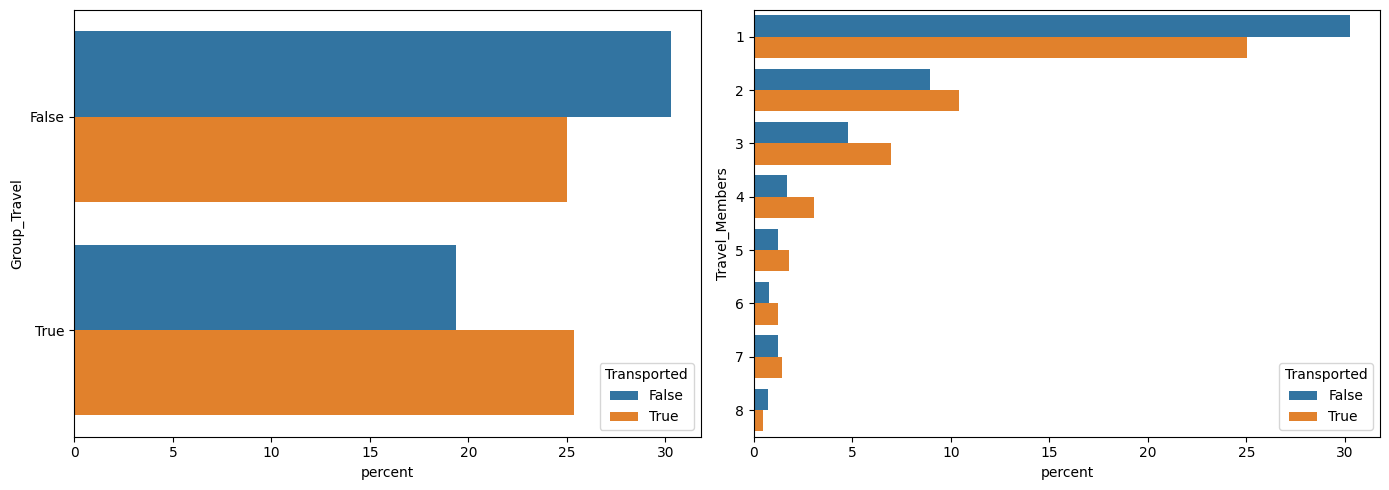

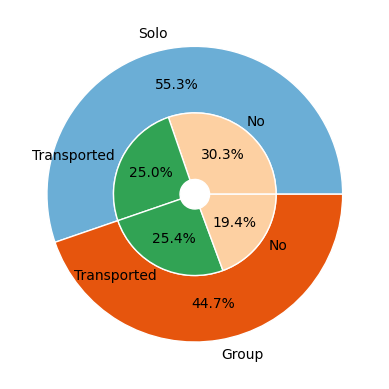

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(y='Group_Travel', data=merged_df, hue='Transported',ax=axs[0], stat='percent')
sns.countplot(y='Travel_Members', data=merged_df, hue='Transported', ax=axs[1], stat='percent')

plt.tight_layout()
plt.show()

# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,8,7])   # TFFT   #cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts all the people travelling in the spaceship
df_tot = merged_df['Group_Travel'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Solo', 'Group']
     #[df_tot.index[0],df_tot.index[1]]  #[False, True]
);

df_tr = merged_df.Transported[merged_df['Group_Travel']==True].value_counts()
df_ntr = merged_df.Transported[merged_df['Group_Travel']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_tr_by_grouptravel= np.concatenate((np.array(df_ntr),np.array(df_tr)))

# Inner pie chart (to show sub-distribution of "Sex")
ax.pie(
    df_tr_by_grouptravel,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['No', 'Transported','Transported','No']
     #[df_tr.index[0],df_tr.index[1],df_ntr.index[0],df_ntr.index[1]]  # False, True, True, False
);

### 'Transportation' and 'Group Travel'

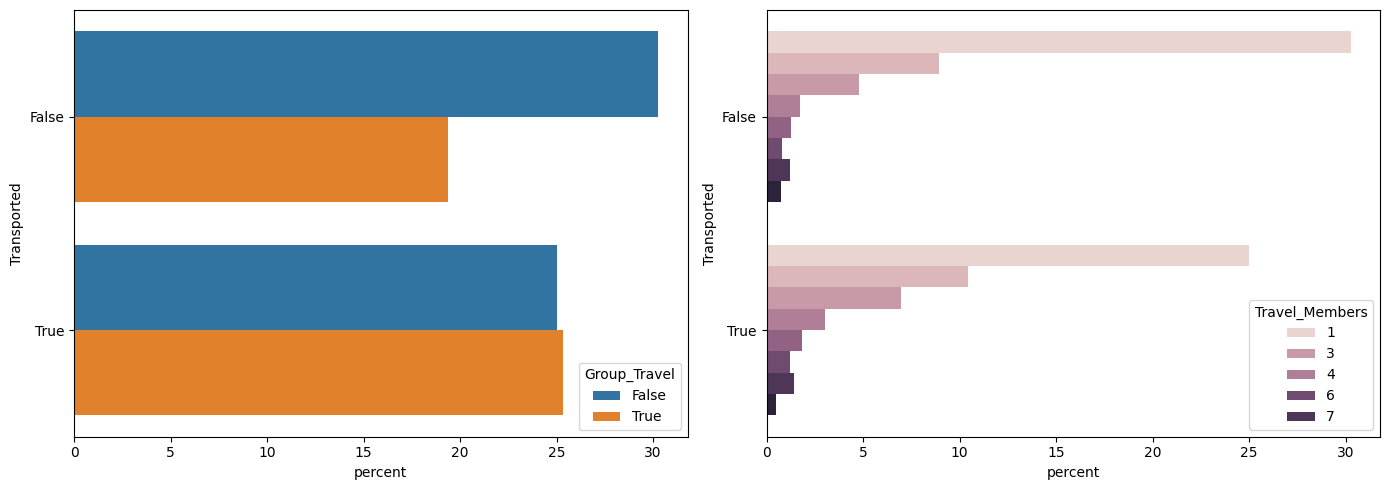

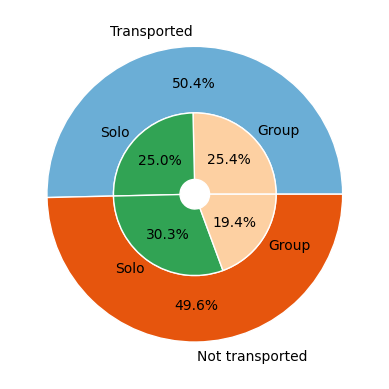

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(y='Transported', data=merged_df, hue='Group_Travel',ax=axs[0], stat='percent')
sns.countplot(y='Transported', data=merged_df, hue='Travel_Members', ax=axs[1], stat='percent')
plt.tight_layout()
plt.show()

# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,8,7])   # TFFT   #cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts all the people travelling in the spaceship
df_tot = merged_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Transported', 'Not transported']
     #[df_tot.index[0],df_tot.index[1]]  #[True, False]
);

# Counts of passengers got transported, by Group_Travel
df_tr = merged_df.Group_Travel[merged_df['Transported']==True].value_counts()

# Counts of passengers not got transported, by Group_Travel
df_ntr = merged_df.Group_Travel[merged_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_tr_by_grouptravel= np.concatenate((np.array(df_tr),np.array(df_ntr)))

# Inner pie chart (to show sub-distribution of "Sex")
ax.pie(
    df_tr_by_grouptravel,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Group','Solo','Solo', 'Group']
     #[df_tr.index[0],df_tr.index[1],df_ntr.index[0],df_ntr.index[1]]  # True, False, False, True
);

### Tree maps

In [ ]:
import plotly.express as px

# For visualisation purposes
DF = merged_df.copy()
DF.dropna(inplace=True)
DF['Age'] = DF['Age'].astype(int)
DF['Transported'] = DF['Transported'].astype(int)

fig = px.treemap(DF, path=['Transported','Group_Travel'], color='Age')
fig.show()

In [ ]:
fig = px.treemap(DF, path=['Transported','Group_Travel','HomePlanet'], color='Age')
fig.show()

In [ ]:
fig = px.treemap(DF, path=['Transported','HomePlanet'], color='Age')
fig.show()

In [ ]:
fig = px.treemap(DF, path=['Transported','HomePlanet', 'Group_Travel'], color='Age')
fig.show()

In [ ]:
# Counting missing values for each column
missing_values = merged_df.isna().sum()
print(missing_values)

# I will continue to fill in....

HomePlanet        201
CryoSleep         217
Destination       182
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Transported         0
Group_Travel        0
Travel_Members      0
Deck              199
Cabin_No          199
Side              199
dtype: int64


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      8492 non-null   object 
 1   CryoSleep       8476 non-null   object 
 2   Destination     8511 non-null   object 
 3   Age             8514 non-null   float64
 4   VIP             8490 non-null   object 
 5   RoomService     8512 non-null   float64
 6   FoodCourt       8510 non-null   float64
 7   ShoppingMall    8485 non-null   float64
 8   Spa             8510 non-null   float64
 9   VRDeck          8505 non-null   float64
 10  Transported     8693 non-null   bool   
 11  Group_Travel    8693 non-null   bool   
 12  Travel_Members  8693 non-null   int64  
 13  Deck            8494 non-null   object 
 14  Cabin_No        8494 non-null   object 
 15  Side            8494 non-null   object 
dtypes: bool(2), float64(6), int64(1), object(7)
memory usage: 967.9+ KB


## 2.2 Masud

#### EDA: Basic bar plots (Categorical features)

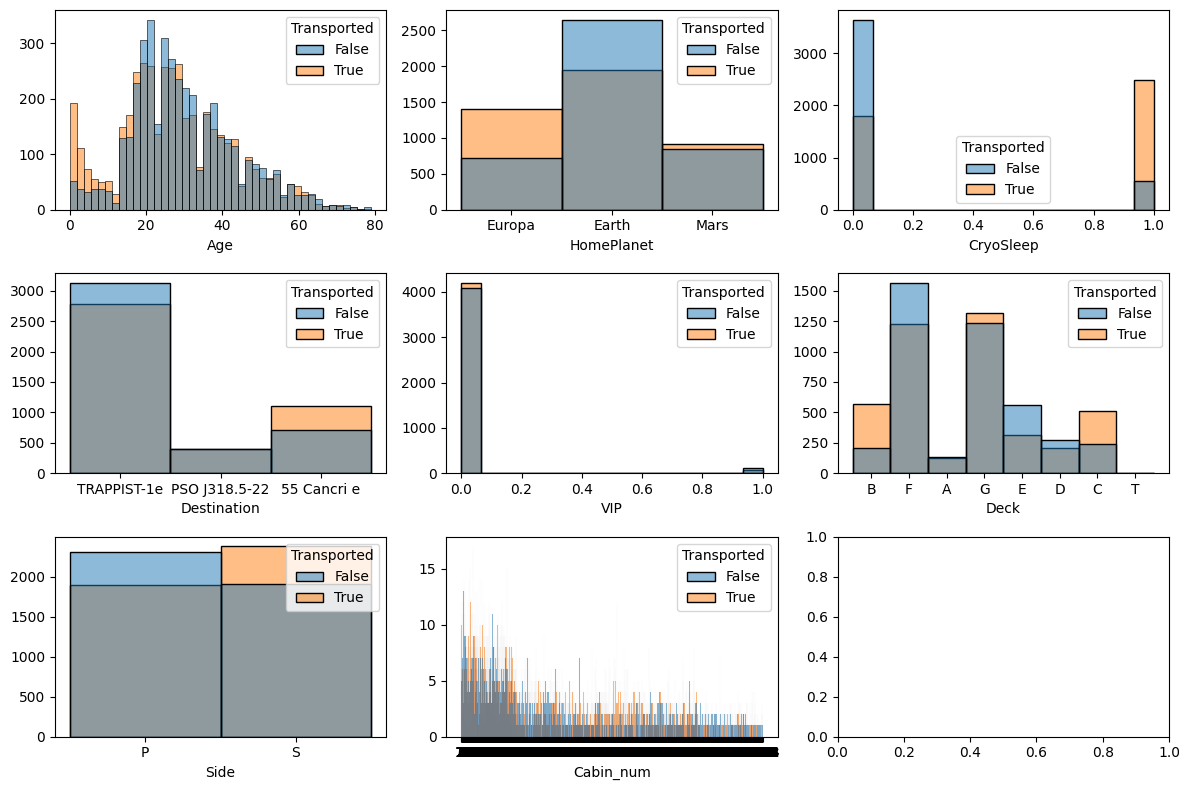

In [ ]:
# EDA: Basic bar plots
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

sns.histplot(x='Age', data=df, hue='Transported', ax=axs[0,0])
sns.histplot(x='HomePlanet', data=df, hue='Transported',ax=axs[0, 1])
sns.histplot(x='CryoSleep', data=df, hue='Transported', ax=axs[0, 2])
sns.histplot(x='Destination', data=df, hue='Transported',ax=axs[1, 0])
sns.histplot(x='VIP', data=df, hue='Transported',  ax=axs[1,1])
sns.histplot(x='Deck', data=df, hue='Transported', ax=axs[1,2])
sns.histplot(x='Side', data=df, hue='Transported', ax=axs[2,0])
sns.histplot(x='Cabin_num', data=df, hue='Transported', ax=axs[2,1])

axs[0, 0].set(ylabel='')
axs[0, 1].set(ylabel='')
axs[0, 2].set(ylabel='')
axs[1, 0].set(ylabel='')
axs[1, 1].set(ylabel='')
axs[1, 2].set(ylabel='')
axs[2, 0].set(ylabel='')
axs[2, 1].set(ylabel='')

plt.tight_layout()
plt.show()

#### Swarm plot:

Make a swarm plot of Age versus FoodCourt here.

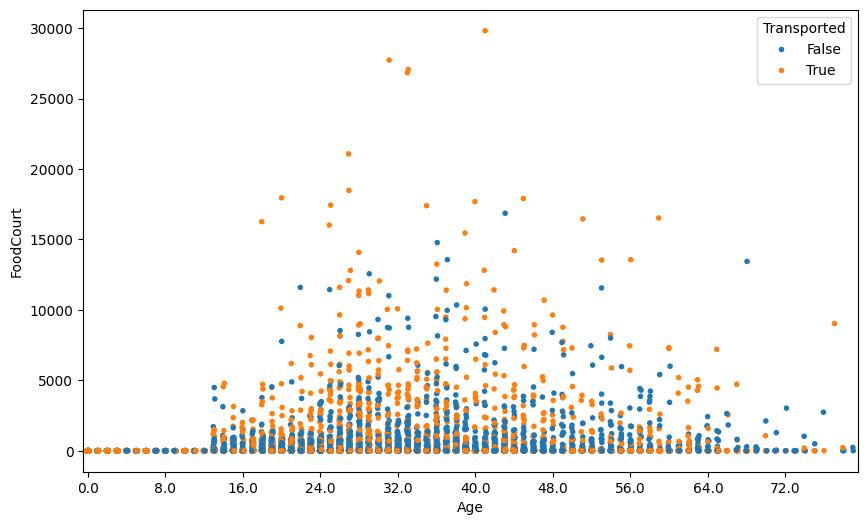

In [ ]:
# EDA: Basic bar plots
fig, axs = plt.subplots(figsize=(10, 6))

sns.stripplot(x='Age', y='FoodCourt', hue='Transported', data=df, size=4);

# Adjust the frequency of the ticks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.show()

#### Bar chart for label column: Transported

<Axes: xlabel='Transported'>

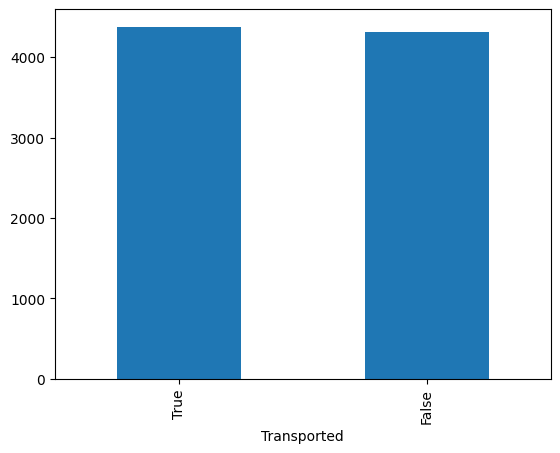

In [ ]:
plot_df = df.Transported.value_counts()
plot_df.plot(kind="bar")

#### Feature Extraction

In [ ]:
# Change Cabin_No column from object to float64
train_df['Cabin_No'] = pd.to_numeric(train_df['Cabin_No'])

# Droping the 'PassengerId', 'Cabin' and 'Name' features
train_df.drop(['PassengerId','Cabin','Name'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

# Feature Extraction
def extract_feature(df):
    # Get categorical column names
    categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

    # Unique values per categorical column
    for i in categorical_columns.tolist():
      # Find unique values in column 'A'
      unique_values_A = df[i].nunique()
      print(f"Unique values in column {i}:", unique_values_A)

    # List of binary categorical columns to encode
    binary_categorical_columns = ['CryoSleep', 'VIP', 'Group_Travel', 'Side'] # Transported is our target column

    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Apply the encoder to the binary categorical columns
    for col in binary_categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    # [Use e.g. the get_dummies() method from the Pandas library to encode the relevant features in this dataset]
    df = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Deck'])

    # Specify the column to exclude
    exclude_column = 'Transported'

    # Replace True/False with 1/0 in all columns except the excluded column
    df.loc[:, df.columns != exclude_column] = df.loc[:, df.columns != exclude_column].replace({True: 1, False: 0})

    return df

In [ ]:
df1 = extract_feature(train_df)
df1.head()

Unique values in column HomePlanet: 3
Unique values in column CryoSleep: 2
Unique values in column Destination: 3
Unique values in column VIP: 2
Unique values in column Transported: 2
Unique values in column Group_Travel: 2
Unique values in column Deck: 8
Unique values in column Side: 2


CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0          0  39.0    0          0.0        0.0           0.0     0.0     0.0   
1          0  24.0    0        109.0        9.0          25.0   549.0    44.0   
2          0  58.0    1         43.0     3576.0           0.0  6715.0    49.0   
3          0  33.0    0          0.0     1283.0         371.0  3329.0   193.0   
4          0  16.0    0        303.0       70.0         151.0   565.0     2.0   

   Transported  Group_Travel  ...  Destination_PSO J318.5-22  \
0        False             0  ...                          0   
1         True             0  ...                          0   
2        False             1  ...                          0   
3        False             1  ...                          0   
4         True             0  ...                          0   

   Destination_TRAPPIST-1e  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  \
0                        1       0       1       0       0       0       0   
1                        1       0       0       0       0       0       1   
2                        1       1       0       0       0       0       0   
3                        1       1       0       0       0       0       0   
4                        1       0       0       0       0       0       1   

   Deck_G  Deck_T  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 27 columns]

<Axes: >

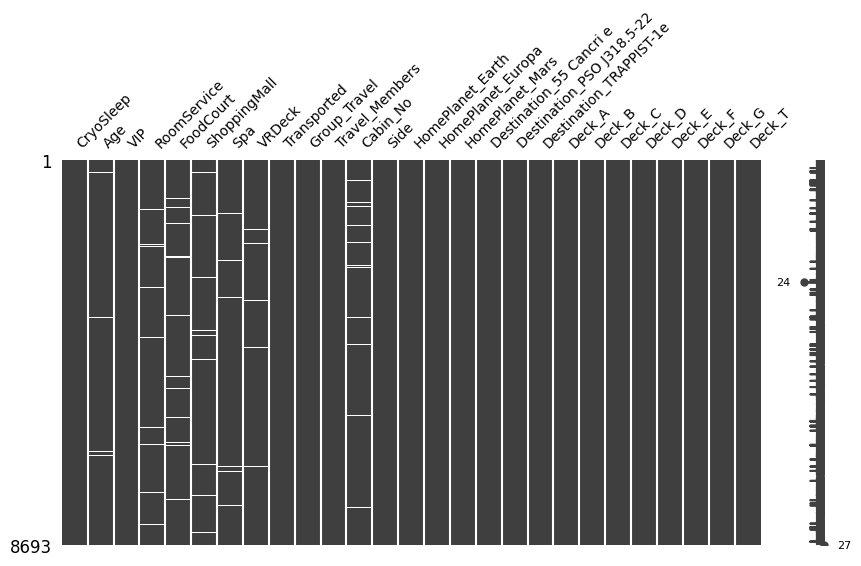

In [ ]:
import missingno as msno
# Show missing values:
msno.matrix(df1,figsize=(10,5),fontsize=10)
#msno.matrix(test,figsize=(10,5),fontsize=10)

#### Data Imputation

In [ ]:
# Replace missing values for numerical features with median.
df1['Age'].fillna(df1['Age'].median()[0], inplace=True)
df1['RoomService'].fillna(df1['RoomService'].median()[0], inplace=True)
df1['FoodCourt'].fillna(df1['FoodCourt'].median()[0], inplace=True)
df1['ShoppingMall'].fillna(df1['ShoppingMall'].median()[0], inplace=True)
df1['Spa'].fillna(df1['Spa'].median()[0], inplace=True)
df1['VRDeck'].fillna(df1['VRDeck'].median()[0], inplace=True)

<Axes: >

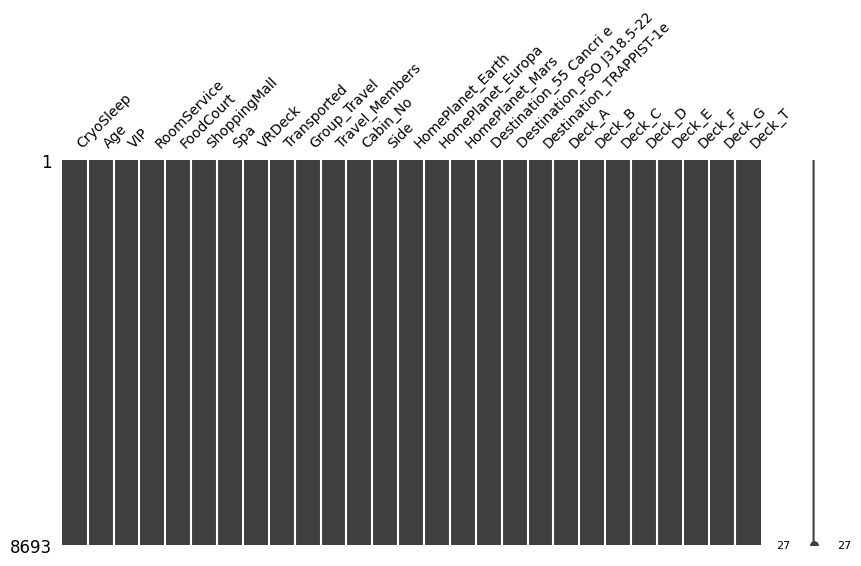

In [ ]:
import missingno as msno
# Show missing values:
msno.matrix(df1,figsize=(10,5),fontsize=10)

## 2.3 Amalu

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset
train_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/train.csv"
test_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/test.csv"
data = pd.read_csv(train_csv_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3    

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
PassengerId       0
HomePlanet        0
Destination       0
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
dtype: int64


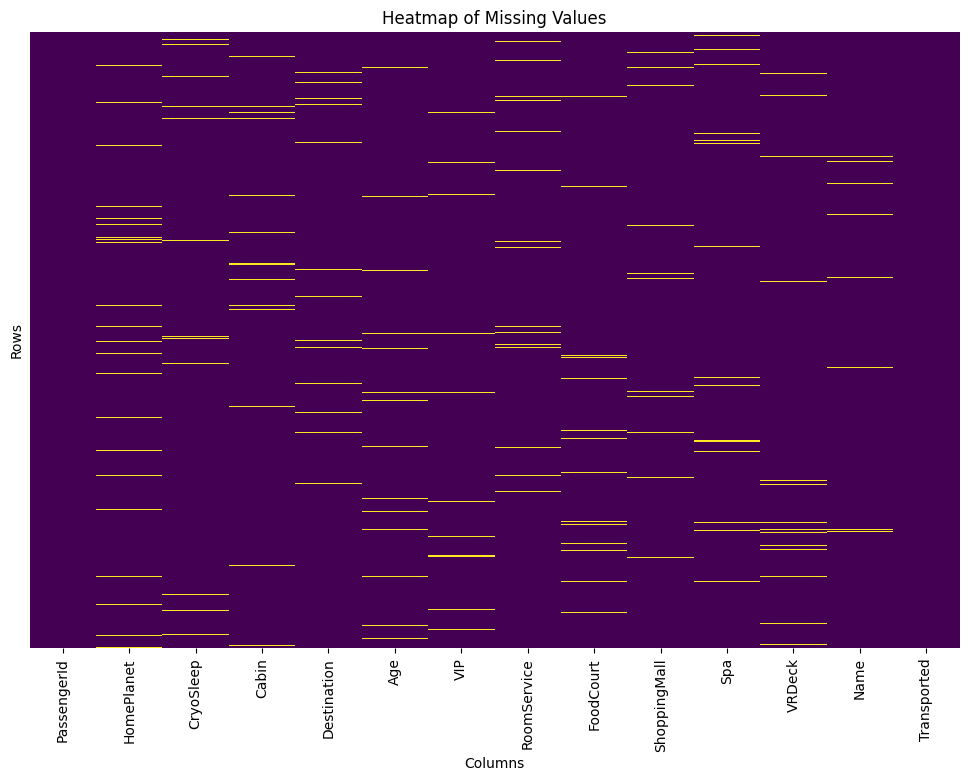

In [ ]:
# Generate a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()



In [ ]:
# Summary statistics for categorical columns
categorical_summary = data.describe(include=['object'])
print("\nSummary statistics for categorical columns:")
print(categorical_summary)




Summary statistics for categorical columns:
       PassengerId HomePlanet  Destination                Name
count         8693       8693         8693                8693
unique        8693          3            3                8473
top        0001_01      Earth  TRAPPIST-1e  Alraium Disivering
freq             1       4803         6097                 202


#### Data Distribution and Relationship


Distribution of numerical features:


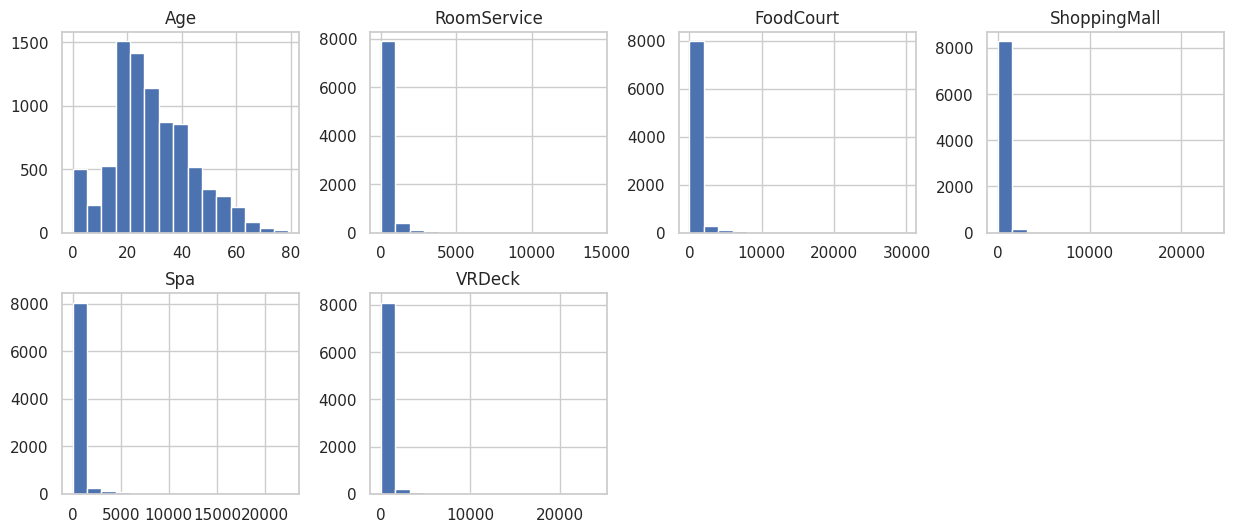

In [ ]:
# Set plot style
sns.set(style="whitegrid")
# Distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
print("\nDistribution of numerical features:")
data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()




Pairplot of numerical features:


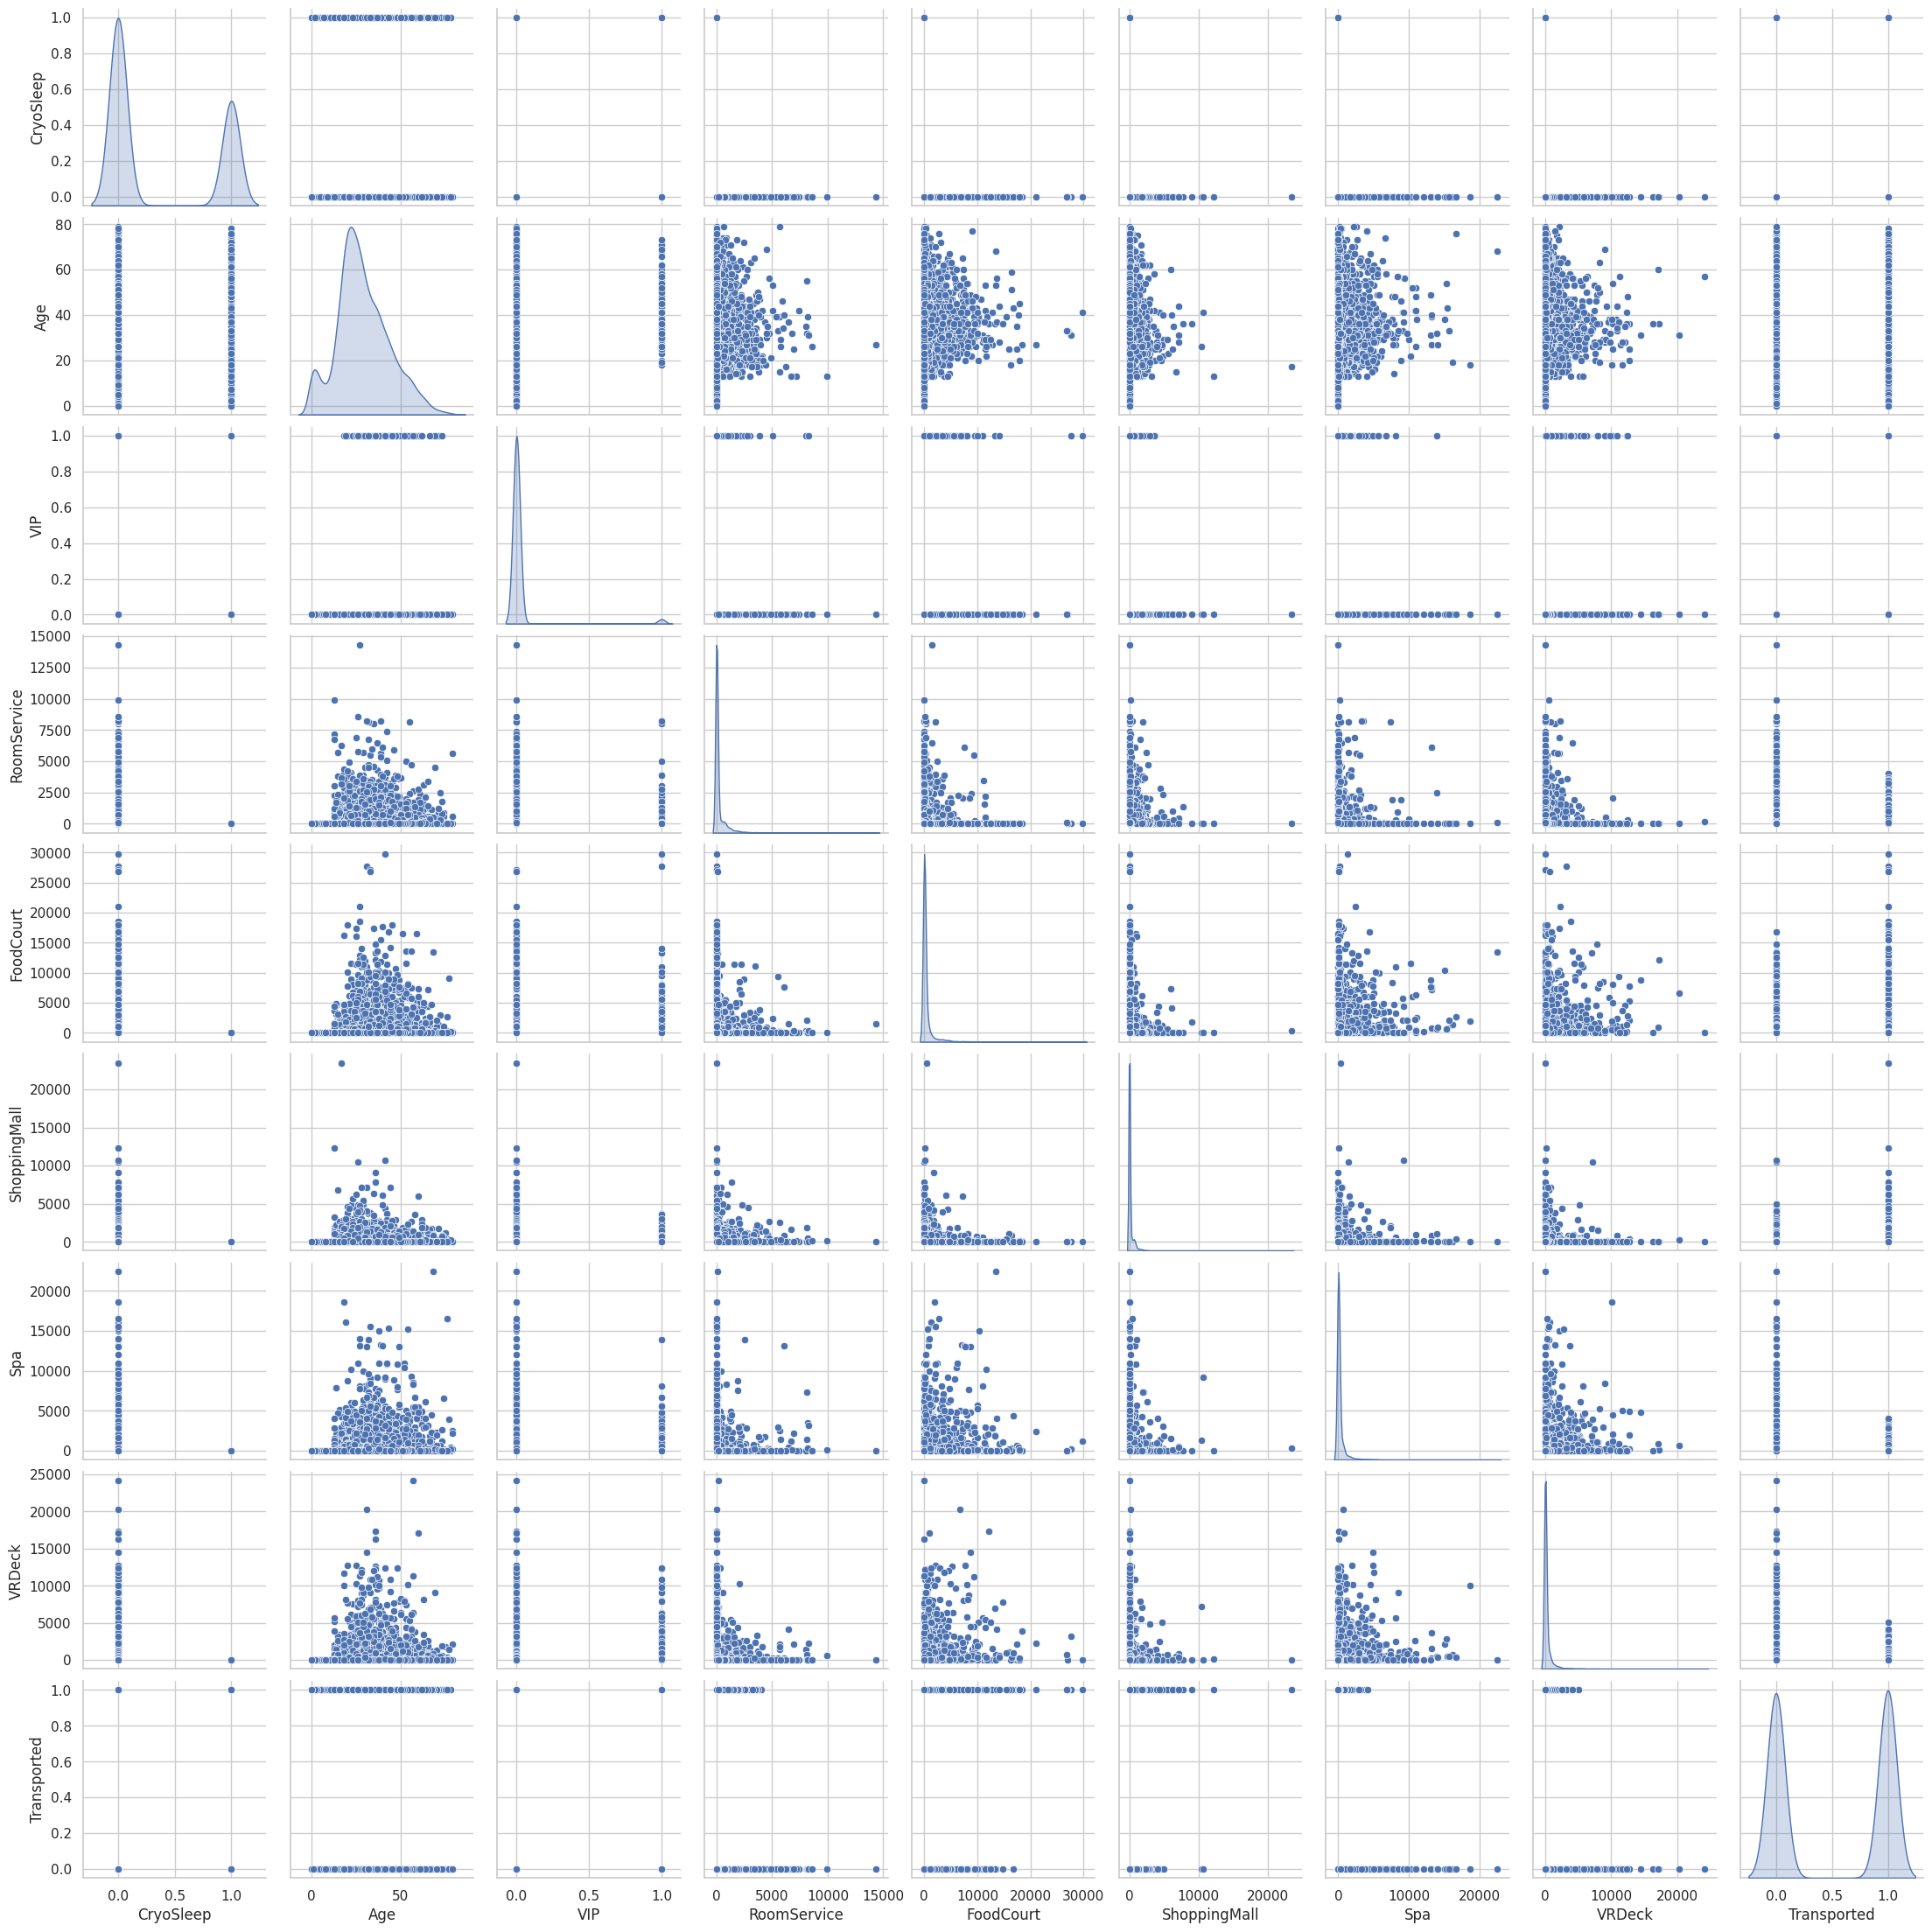

In [ ]:
# Pairplot to visualize relationships between numerical features
print("\nPairplot of numerical features:")
sns.pairplot(data, diag_kind='kde')
plt.show()


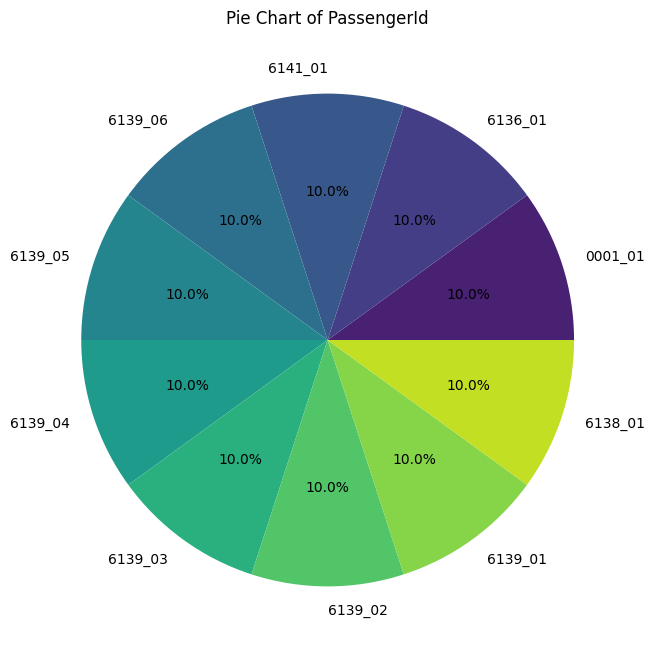

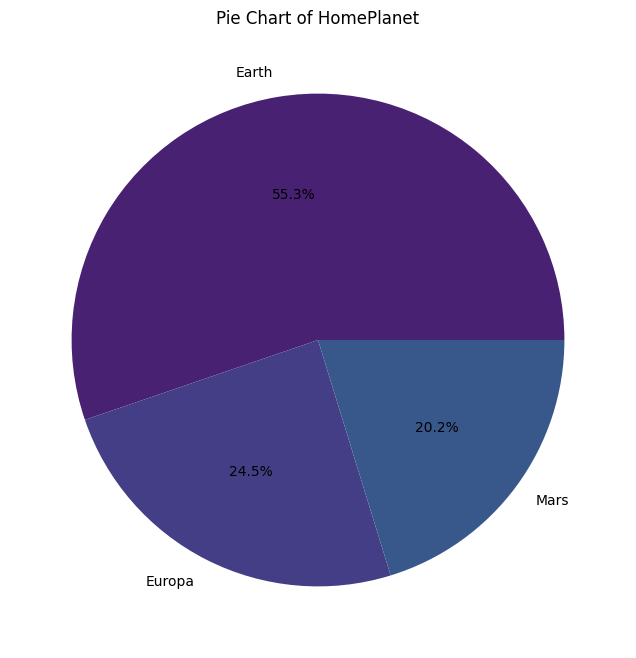

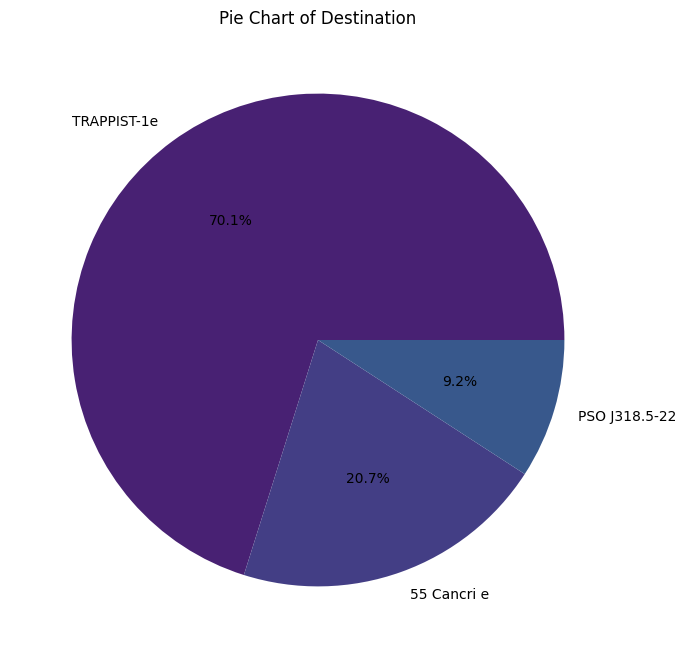

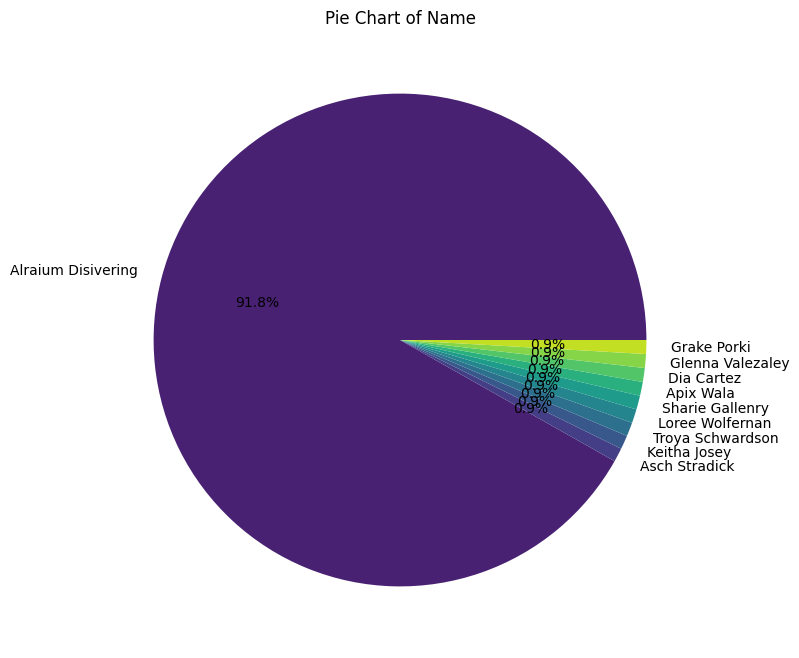

In [ ]:
# Pie Chart for categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 8))
    top_categories = data[feature].value_counts().nlargest(10)  # Top 10 categories
    plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=10))
    plt.title(f'Pie Chart of {feature}')
    plt.show()



Correlation heatmap:


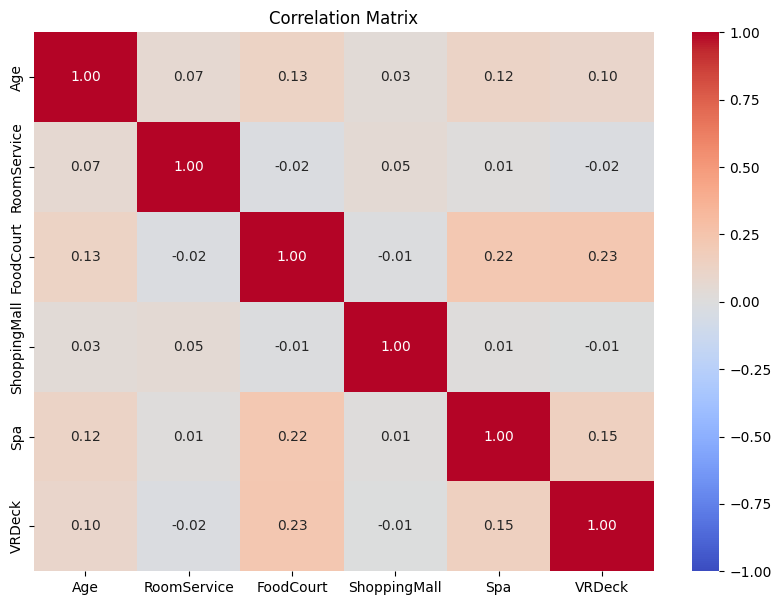

In [ ]:
# Compute the correlation matrix for numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()

# Generate a heatmap
print("\nCorrelation heatmap:")
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 2.4 Shahana

In [ ]:
## Work by Shahana

# import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [ ]:
# Path for the data in the GitHub repository
train_data_path = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/train.csv'
test_data_path = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/test.csv'

In [ ]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### EDA

<Axes: >

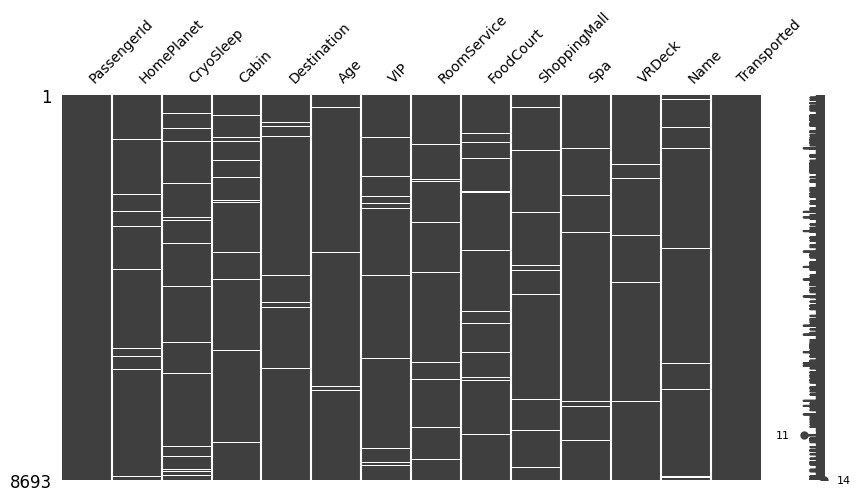

In [ ]:
import missingno as msno
# Show missing values:
msno.matrix(train,figsize=(10,5),fontsize=10)
#msno.matrix(test,figsize=(10,5),fontsize=10)

In [ ]:
# Display basic statistics of the training data
print(train.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [ ]:
# Check for missing values
missing_values = train.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [ ]:
# Drop the 'Name' column
train.drop(['Name'], axis=1, inplace=True)

In [ ]:
# Separate features and target variable in the training data
X = train.drop(['Transported', 'PassengerId'], axis=1)
y = train['Transported']

In [ ]:
# Encode categorical variables with LabelEncoder first to prepare for KNN imputer
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column].astype(str))

# One-hot encode categorical variables
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform on the training data
X_encoded = onehot_encoder.fit_transform(X[categorical_cols])
X_encoded = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded DataFrame back to the original DataFrame
X.drop(categorical_cols, axis=1, inplace=True)
X_train = pd.concat([X, X_encoded], axis=1)

In [ ]:
# Verify the columns after encoding
print("Columns after encoding:")
print(X_train.columns)

Columns after encoding:
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_1', 'HomePlanet_2', 'HomePlanet_3', 'CryoSleep_1',
       ...
       'Cabin_6556', 'Cabin_6557', 'Cabin_6558', 'Cabin_6559', 'Cabin_6560',
       'Destination_1', 'Destination_2', 'Destination_3', 'VIP_1', 'VIP_2'],
      dtype='object', length=6576)


#### DATA IMPUTATION

In [ ]:
# Impute missing values using KNNImputer on X_train
knn_imputer = KNNImputer(n_neighbors=5)
X_imputed = knn_imputer.fit_transform(X_train)
X_imputed = pd.DataFrame(X_imputed, columns=X_train.columns)

In [ ]:
# Verify imputed data
X_imputed.head() # Print first few rows of X_train_imputed to verify imputation

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  HomePlanet_1  \
0  39.0          0.0        0.0           0.0     0.0     0.0           1.0   
1  24.0        109.0        9.0          25.0   549.0    44.0           0.0   
2  58.0         43.0     3576.0           0.0  6715.0    49.0           1.0   
3  33.0          0.0     1283.0         371.0  3329.0   193.0           1.0   
4  16.0        303.0       70.0         151.0   565.0     2.0           0.0   

   HomePlanet_2  HomePlanet_3  CryoSleep_1  ...  Cabin_6556  Cabin_6557  \
0           0.0           0.0          0.0  ...         0.0         0.0   
1           0.0           0.0          0.0  ...         0.0         0.0   
2           0.0           0.0          0.0  ...         0.0         0.0   
3           0.0           0.0          0.0  ...         0.0         0.0   
4           0.0           0.0          0.0  ...         0.0         0.0   

   Cabin_6558  Cabin_6559  Cabin_6560  Destination_1  Destination_2  \
0         0.0         0.0         0.0            0.0            1.0   
1         0.0         0.0         0.0            0.0            1.0   
2         0.0         0.0         0.0            0.0            1.0   
3         0.0         0.0         0.0            0.0            1.0   
4         0.0         0.0         0.0            0.0            1.0   

   Destination_3  VIP_1  VIP_2  
0            0.0    0.0    0.0  
1            0.0    0.0    0.0  
2            0.0    1.0    0.0  
3            0.0    0.0    0.0  
4            0.0    0.0    0.0  

[5 rows x 6576 columns]

## 2.4.1 Training and Test Data

--------------- Processing Training data -----------------
Printing Unique Values
HomePlanet: 3
CryoSleep: 2
Destination: 3
VIP: 2
Transported: 2
Group_Travel: 2
Deck: 8
Side: 2
---------- End of processing Training data ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   Group_Travel               8693 non

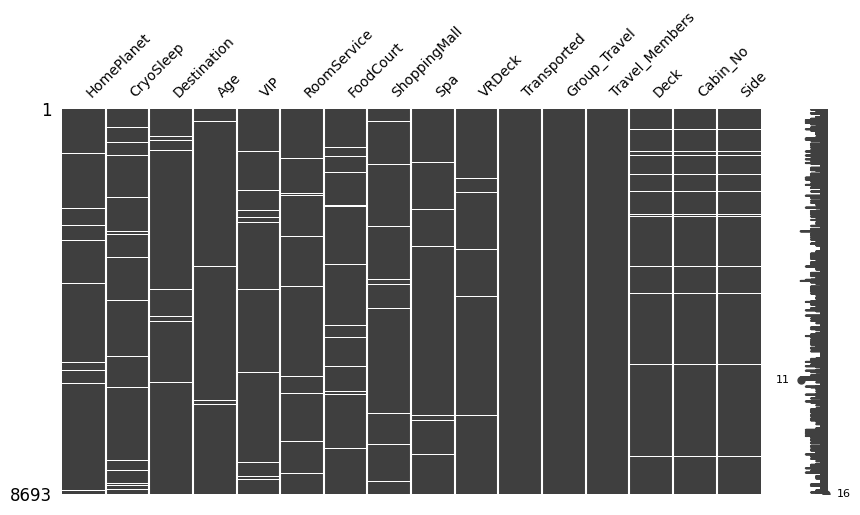

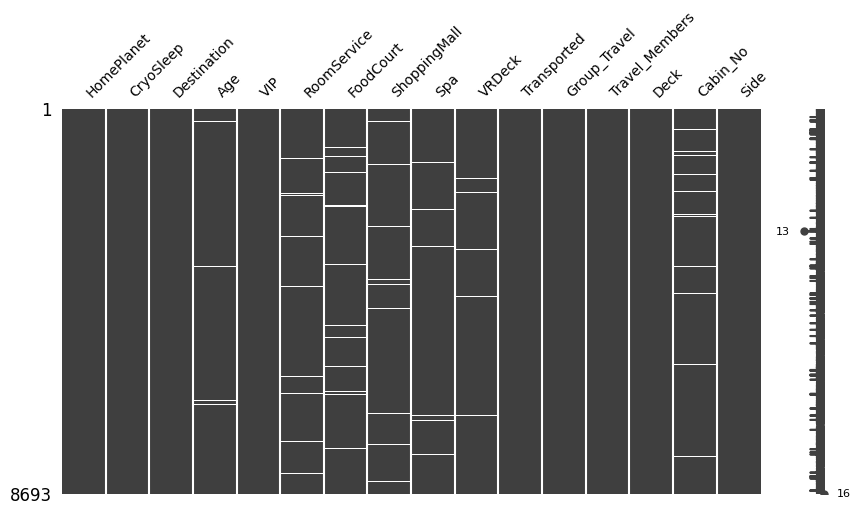

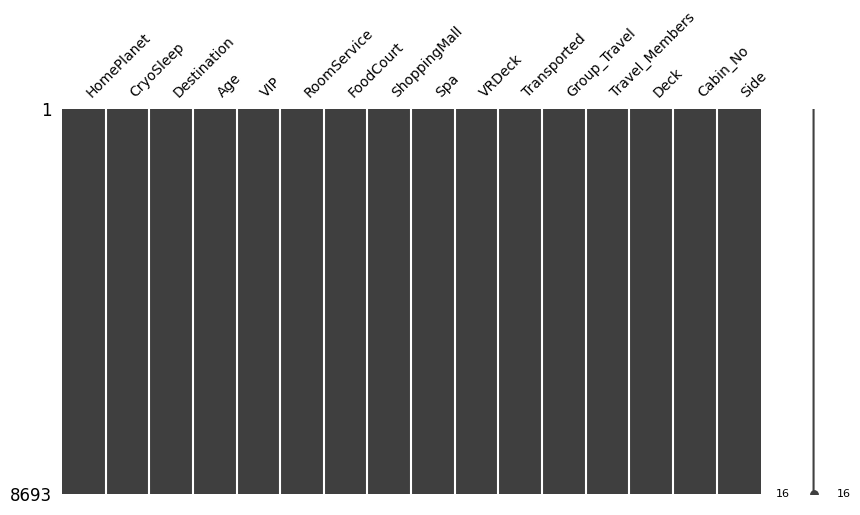

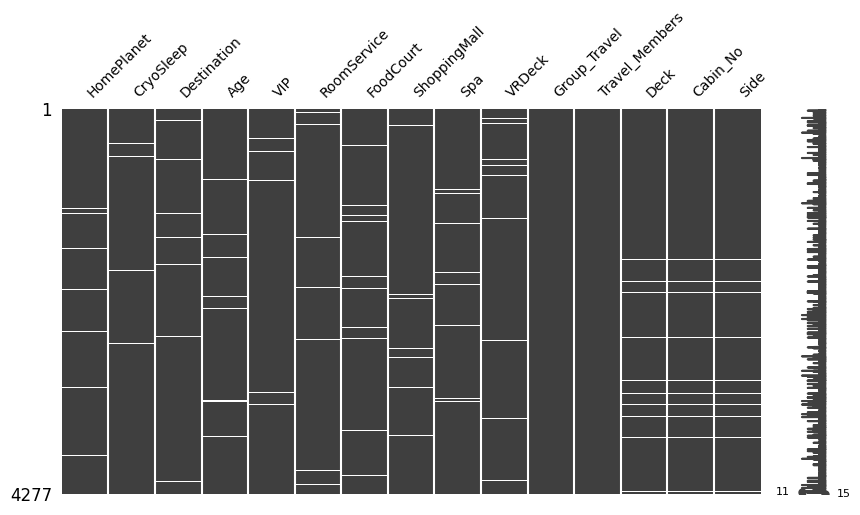

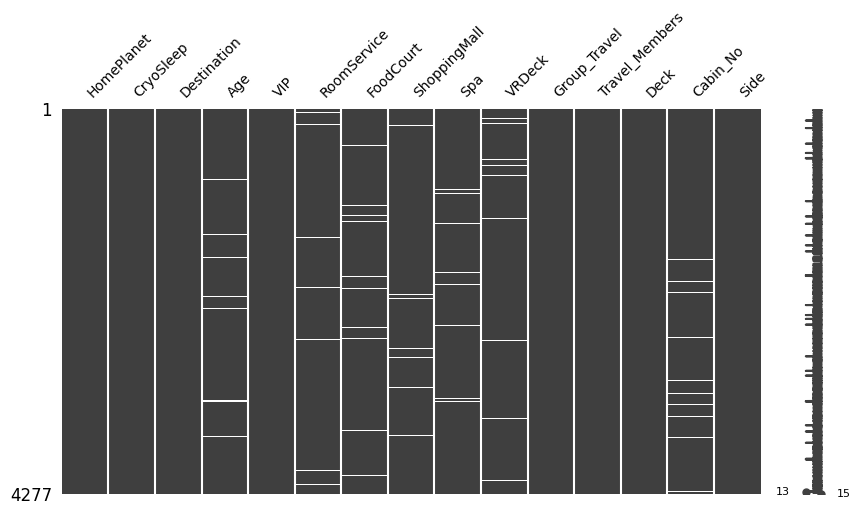

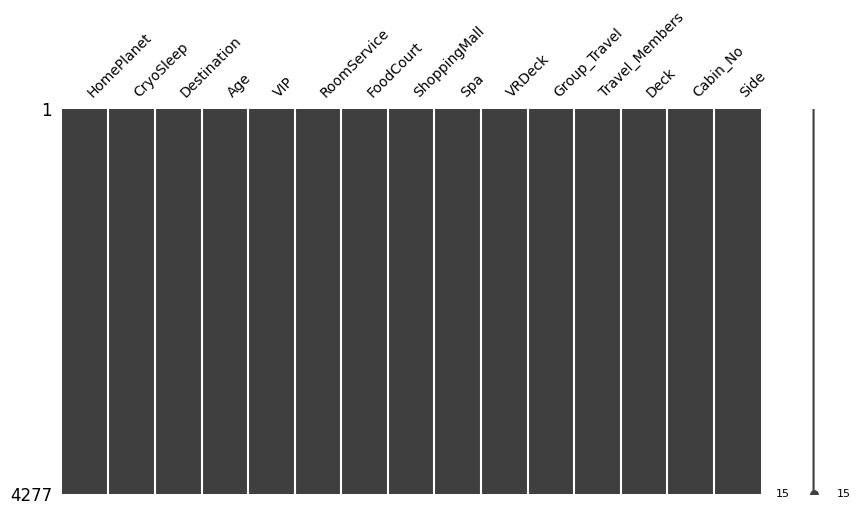

In [ ]:
train_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/train.csv"
test_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/test.csv"

def processing(df, flag):

  print(f'--------------- Processing {flag} data -----------------')
  # Obtaining 'Group_Travel' and 'Travel_Memebrs' features from 'Group_ID'
  df['GroupId'] = df['PassengerId'].str.split('_').str[0]
  df['GroupId'] = pd.to_numeric(df['GroupId'])
  df['MemberId'] = df['PassengerId'].str.split('_').str[1]
  df['MemberId'] = pd.to_numeric(df['MemberId'])
  df1= df.groupby('GroupId')['MemberId'].agg('count').reset_index()  # Coverting dataframe
  df1.rename(columns={'MemberId': 'Member_Count'}, inplace=True)
  df1['Group_travel'] = (df1['Member_Count']>1).astype(int)
  Groups = df1[df1['Group_travel'] == 1]['GroupId'] #.reset_index()
  Groups = set(Groups) # Convert Groups to a set
  # Obtaining actual groups IDs with more one person.
  df['Group_Travel'] = df['GroupId'].isin(Groups)

  # Merges the dataframes on GroupId, with a left join ensuring all rows from df are kept.
  df2 = pd.merge(df, df1[['GroupId','Member_Count']], on='GroupId', how='left')

  # Rename the Member_Count column to travel_members
  df2.rename(columns={'Member_Count': 'Travel_Members'}, inplace=True)
  df2.drop(['GroupId','MemberId'], axis=1, inplace = True)
  # Obtaining Deck, Cabin_No and Side from 'Cabin' feature
  df2[["Deck", "Cabin_No", "Side"]] = df2["Cabin"].str.split("/", expand=True)
  df2.drop(['PassengerId','Cabin','Name'], axis=1, inplace=True)
  df2['Cabin_No'] = pd.to_numeric(df2['Cabin_No'])


  categorical_columns = df2.select_dtypes(include=['object', 'category', 'bool']).columns
  print('Printing Unique Values')
  for cat in categorical_columns:
    unique_values = df2[cat].nunique()
    print(f"{cat}:", unique_values)

  from sklearn.impute import SimpleImputer
  msno.matrix(df2,figsize=(10,5),fontsize=10)
  Categories=df2.select_dtypes(include=['object']).columns

  # Impute missing values of the categorical features
  imputer = SimpleImputer(strategy='most_frequent')
  df2[Categories] = imputer.fit_transform(df2[Categories])
  msno.matrix(df2,figsize=(10,5),fontsize=10)

  # Impute missing values of the numerical features
  Num_Features=df2.select_dtypes(include=['float']).columns
  for num_feature in Num_Features:
    df2[num_feature].fillna(df2[num_feature].mode()[0], inplace=True)
  msno.matrix(df2,figsize=(10,5),fontsize=10)

  df2['VIP'] = df2['VIP'].astype(int)   #object to int (only two categories)
  df2['CryoSleep'] = df2['CryoSleep'].astype(int)   #object to int (only two categories)

  # Feature Encoding
  encoded_df = pd.get_dummies(df2, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], dummy_na=False)
  binary_features=encoded_df.select_dtypes(include=['bool']).columns
  # bool to int
  for feature in binary_features:
    encoded_df[feature] = encoded_df[feature].astype(int)

  print(f'---------- End of processing {flag} data ---------------')
  return encoded_df

# Processing the training data file
train_data = pd.read_csv(train_csv_path)
train_df = processing(train_data, 'Training')
train_df.info()

# Processing the test data file
test_data = pd.read_csv(test_csv_path)
test_df = processing(test_data, 'Testing')
test_df.info()

## 2.5 Sunitha

In [ ]:
## Work by Sunitha
# Import all the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Path for the data in the GitHub repository
train_data_path = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/train.csv'
test_data_path = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/test.csv'

In [ ]:
# Read data from the GitHub repository
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [ ]:
# Print the first 5 rows of the data
train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [ ]:
# Install H20AutoML (only need to do this once)
!pip install h2o

# Import packages
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.4-py2.py3-none-any.whl size=265375577 sha256=32b5bf95126f59046d209febf38df6f93070a134b5167994cf417845cfde7a0b
  Stored in directory: /root/.cache/pip/wheels/4d/a6/47/8bfeb1026fd65cb8630beb74d8e3bec844f572cf4f336fdd56
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq39did7g
  JVM stdout: /tmp/tmpq39did7g/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpq39did7g/h2o_unknownUser_sta

--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.4
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_unknownUser_egeqwv
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Convert to H2OFrame
train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Set response and predictor variables
response = 'Transported'  # Target column
predictors = [col for col in train_df.columns if col != response]

# Convert target to a factor for classification
train_h2o[response] = train_h2o[response].asfactor()

In [ ]:
# Initialize H2O AutoML
aml = H2OAutoML(max_runtime_secs=3600,  # 1 hour for running
                seed=42,
                include_algos=["GBM", "DeepLearning", "DRF", "XGBoost"],
                verbosity='info')

# Train model
aml.train(x=predictors, y=response, training_frame=train_h2o)

AutoML progress: |
13:17:45.636: Project: AutoML_1_20240712_131745
13:17:45.639: 5-fold cross-validation will be used.
13:17:45.643: Setting stopping tolerance adaptively based on the training frame: 0.010725441049259411
13:17:45.643: Build control seed: 42
13:17:45.644: training frame: Frame key: AutoML_1_20240712_131745_training_py_1_sid_9bf9    cols: 14    rows: 8693  chunks: 1    size: 925639  checksum: -2514395294099846179
13:17:45.645: validation frame: NULL
13:17:45.645: leaderboard frame: NULL
13:17:45.645: blending frame: NULL
13:17:45.645: response column: Transported
13:17:45.645: fold column: null
13:17:45.646: weights column: null
13:17:45.675: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6g, 10w)]}

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240712_131745_model_27


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    53                 53                          92232                  12           14           13.9434       32            124           83.1887

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06551809163927166
RMSE: 0.2559650203431548
LogLoss: 0.2362110862287838
Mean Per-Class Error: 0.0766532282184122
AUC: 0.9771604784694569
AUCPR: 0.9797468445269419
Gini: 0.9543209569389137

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47229919663951964
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  4029     286     0.0663   (286.0/4315.0)
True   381      3997    0.087    (381.0/4378.0)
Total  4410     4283    0.0767   (667.0/8693.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.472299     0.922988  200
max f2                       0.239055     0.935312  277
max f0point5                 0.617918     0.946078  155
max accuracy                 0.493141     0.923387  193
max precision                0.992399     1         0
max recall                   0.0624793    1         369
max specificity              0.992399     1         0
max absolute_mcc             0.493141     0.847365  193
max min_per_class_accuracy   0.44837      0.92074   208
max mean_per_class_accuracy  0.493141     0.923514  193
max tns                      0.992399     4315      0
max fns                      0.992399     4323      0
max fps                      0.00804291   4315      399
max tps                      0.0624793    4378      369
max tnr                      0.992399     1         0
max fnr                      0.992399     0.987437  0
max fpr                      0.00804291   1         399
max tpr                      0.0624793    1         369

Gains/Lift Table: Avg response rate: 50.36 %, avg score: 50.29 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101231                   0.990484           1.98561    1.98561            1                0.991889   1                           0.991889            0.0201005       0.0201005                  98.561    98.561             0.0201005
2        0.0200161                   0.989623           1.98561    1.98561            1                0.989887   1                           0.9909              0.0196437       0.0397442                  98.561    98.561             0.0397442
3        0.0300242                   0.988544           1.98561    1.98561            1                0.989106   1                           0.990302            0.0198721       0.0596163                  98.561    98.561             0.0596163
4        0.0400322                   0.987429           1.98561    1.98561            1                0.988079   1                           0.989746            0.0198721       0.0794884                  98.561    98.561             0.0794884
5        0.0500403                   0.985597           1.98561    1.98561            1             

In [ ]:
# View AutoML Leaderboard
lb = aml.leaderboard
print(lb)

# Get the best model
best_model = aml.leader
print(best_model)

# Performance on test set
perf = best_model.model_performance(test_h2o)
print(perf)

model_id                                           auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_grid_1_AutoML_2_20240711_101028_model_27  0.889936   0.415654  0.900184                0.199377  0.368352  0.135683
GBM_grid_1_AutoML_2_20240711_101028_model_10  0.889736   0.41802   0.900584                0.200172  0.369363  0.136429
GBM_grid_1_AutoML_2_20240711_101028_model_28  0.888931   0.414691  0.899905                0.200633  0.367948  0.135386
GBM_grid_1_AutoML_2_20240711_101028_model_22  0.888699   0.417198  0.899186                0.204925  0.368215  0.135582
GBM_5_AutoML_2_20240711_101028                0.888309   0.41762   0.899273                0.2016    0.368786  0.136003
GBM_grid_1_AutoML_2_20240711_101028_model_39  0.888009   0.417881  0.899327                0.204077  0.368749  0.135976
GBM_grid_1_AutoML_2_20240711_101028_model_19  0.887737   0.417916  0.898472                0.201029  0.368046  0.135458
GBM_grid_1_AutoML_2_20240711_101028_mode

## 2.6 Pooja

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Path for the data and Load the dataset
train_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/train.csv"
test_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/test.csv"
data = pd.read_csv(train_csv_path)

data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [ ]:
# Summary statistics for categorical columns
categorical_summary = data.describe(include=['object'])
print("\nSummary statistics for categorical columns:")
print(categorical_summary)


Summary statistics for categorical columns:
       PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name  
count             8493  
unique            8473  
top     Gollux Reedall  
freq                 2  


In [ ]:
# Search for missing values
missing_values = data.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
import xgboost

X = train_df.drop(['Transported'], axis = 1)
y = train_df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Train set shape: {X_train.shape}, {y_train.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')

# Define a model
xgb_clf = XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

# train the XGBoost classifier with the best hyperparameters
best_xgb_clf = XGBClassifier(**grid_search.best_params_)
best_xgb_clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = best_xgb_clf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

# print the confusion matrix and classification report
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))# Define a model

Train set shape: (6954, 27), (6954,)
Test set shape: (1739, 27), (1739,)
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
Confusion matrix:
[[672 189]
 [158 720]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       861
           1       0.79      0.82      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



## 2.7 Shreya

**Best model**

In [ ]:
best_model

In [ ]:
learning_curve_plot = best_model.learning_curve_plot()

In [ ]:
plt.figure(figsize=(4, 5))
best_model.varimp_plot()
plt.tight_layout()

In [ ]:
va_plot = aml.varimp_heatmap()

# Section 3: Initial Experiment -v1
by Dileepa

Imputing data using mode and mean for categorical and numerical features. However, full trainning dataset is used to impute the missing values without subsetting. Same features extraction, transformation, normalisation and encoding are used here as above.

This section can be run independently as it does not have any dependency with previous cells.

In [ ]:
# Include all your imports here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Install eli5
!pip install eli5

# Install H2O
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=7bc8feae471cc9f5b8514d1ad2de21c44395a3530ad7e7be97003dfc89d7a25b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.4-py2.py3-none-any.whl size=265375577 sha256=6206b67102d94d0eddb4d0bda2a8bdc01e90ff8a1985df68b75cf31055e8542f
  Stored in directory: /root/.cache/pip/wheels/4d/a6/47/8bfeb1026fd65cb8630beb74d8e3bec844f572cf4f336fdd56
Successfully built h2o


In [ ]:
from sklearn.impute import SimpleImputer

train_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/train.csv"
test_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/test.csv"

def processing(df, flag):

  print(f'--------------- Processing {flag} data -----------------')
  # Obtaining 'Group_Travel' and 'Travel_Memebrs' features from 'Group_ID'
  df['GroupId'] = df['PassengerId'].str.split('_').str[0]
  df['GroupId'] = pd.to_numeric(df['GroupId'])
  df['MemberId'] = df['PassengerId'].str.split('_').str[1]
  df['MemberId'] = pd.to_numeric(df['MemberId'])
  df1= df.groupby('GroupId')['MemberId'].agg('count').reset_index()  # Coverting dataframe
  df1.rename(columns={'MemberId': 'Member_Count'}, inplace=True)
  df1['Group_travel'] = (df1['Member_Count']>1).astype(int)
  Groups = df1[df1['Group_travel'] == 1]['GroupId'] #.reset_index()
  Groups = set(Groups) # Convert Groups to a set
  # Obtaining actual groups IDs with more one person.
  df['Group_Travel'] = df['GroupId'].isin(Groups)

  # Merges the dataframes on GroupId, with a left join ensuring all rows from df are kept.
  df2 = pd.merge(df, df1[['GroupId','Member_Count']], on='GroupId', how='left')

  # Rename the Member_Count column to travel_members
  df2.rename(columns={'Member_Count': 'Travel_Members'}, inplace=True)
  df2.drop(['GroupId','MemberId'], axis=1, inplace = True)

  # Obtaining Deck, Cabin_No and Side from 'Cabin' feature
  df2[["Deck", "Cabin_No", "Side"]] = df2["Cabin"].str.split("/", expand=True)
  # Dropping original 'PassengerId','Cabin','Name' features.
  df2.drop(['PassengerId','Cabin','Name'], axis=1, inplace=True)
  df2['Cabin_No'] = pd.to_numeric(df2['Cabin_No'])

  # Printing the number of unique sub-categories in each categorical variable
  categorical_columns = df2.select_dtypes(include=['object', 'category', 'bool']).columns
  print('Printing Unique Values')
  for cat in categorical_columns:
    unique_values = df2[cat].nunique()
    print(f"{cat}:", unique_values)

  #Visualising missing values
  msno.matrix(df2,figsize=(10,5),fontsize=10)
  Categories=df2.select_dtypes(include=['object']).columns

  # Impute missing values of the categorical features
  imputer = SimpleImputer(strategy='most_frequent')
  df2[Categories] = imputer.fit_transform(df2[Categories])
  msno.matrix(df2,figsize=(10,5),fontsize=10)

  # Impute missing values of the numerical features
  Num_Features=df2.select_dtypes(include=['float']).columns
  for num_feature in Num_Features:
    df2[num_feature].fillna(df2[num_feature].mode()[0], inplace=True)
  msno.matrix(df2,figsize=(10,5),fontsize=10)

  df2['VIP'] = df2['VIP'].astype(int)   #object to int (only two categories)
  df2['CryoSleep'] = df2['CryoSleep'].astype(int)   #object to int (only two categories)

  #------- Numerical feature scaling using min-max normalisation----------------
  def normalise_feature(var):
    var_min = np.min(var)
    var_max = np.max(var)
    normalised_var = (var - var_min) / (var_max - var_min)
    return normalised_var

  features_to_scale = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  # Although Cabin_No is float, only countable numbers are present
  for feature in features_to_scale:
    df2[feature]=normalise_feature(df2[feature])
  #-------- End of numerical feature scaling -----------------------------------


  # Feature Encoding
  encoded_df = pd.get_dummies(df2, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], dummy_na=False)
  binary_features=encoded_df.select_dtypes(include=['bool']).columns
  # bool to int
  for feature in binary_features:
    encoded_df[feature] = encoded_df[feature].astype(int)

  print(f'---------- End of processing {flag} data ---------------')
  return encoded_df

--------------- Processing Training data -----------------
Printing Unique Values
HomePlanet: 3
CryoSleep: 2
Destination: 3
VIP: 2
Transported: 2
Group_Travel: 2
Deck: 8
Side: 2
---------- End of processing Training data ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   Group_Travel               8693 non

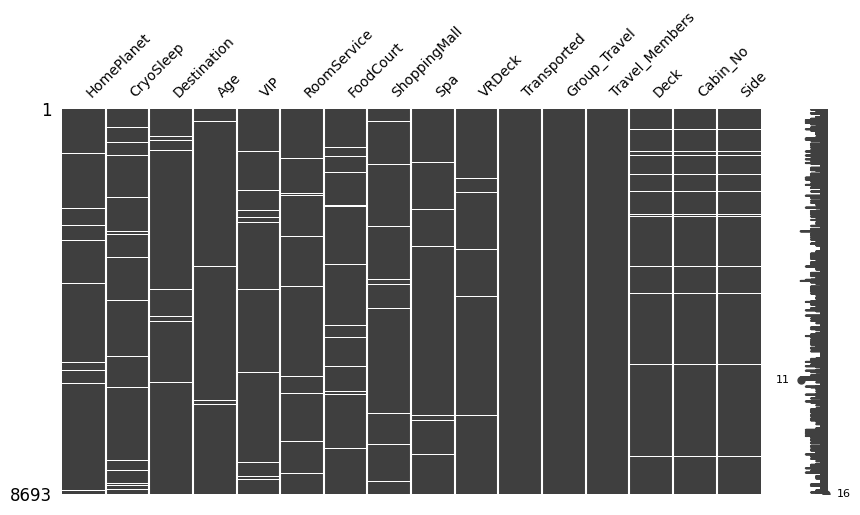

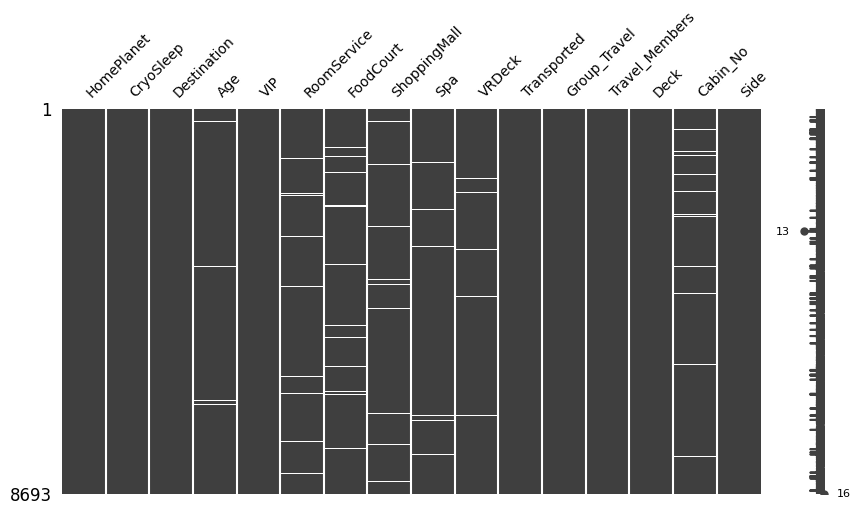

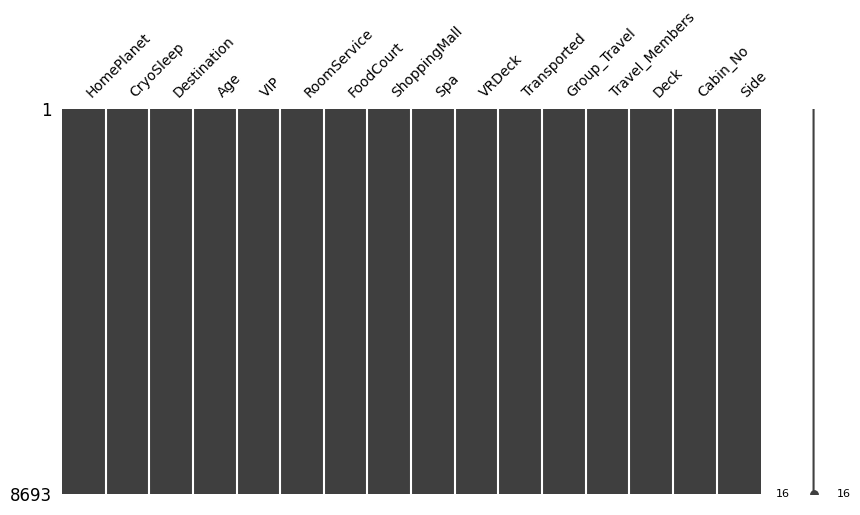

In [ ]:
# Processing the training data file
train_data = pd.read_csv(train_csv_path)
train_df = processing(train_data, 'Training')
train_df.info()

--------------- Processing Testing data -----------------
Printing Unique Values
HomePlanet: 3
CryoSleep: 2
Destination: 3
VIP: 2
Group_Travel: 2
Deck: 8
Side: 2
---------- End of processing Testing data ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   int64  
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   Group_Travel               4277 non-null   int64  
 9   Travel_Members             4277 non-null   int64  
 

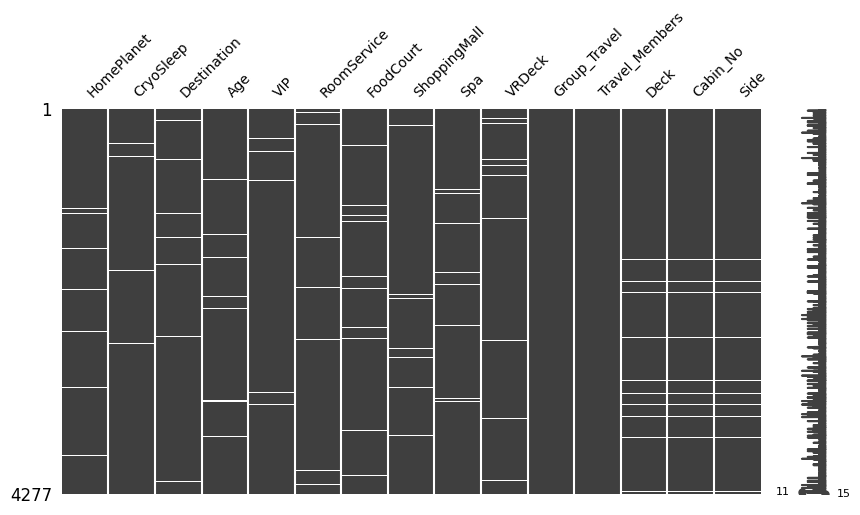

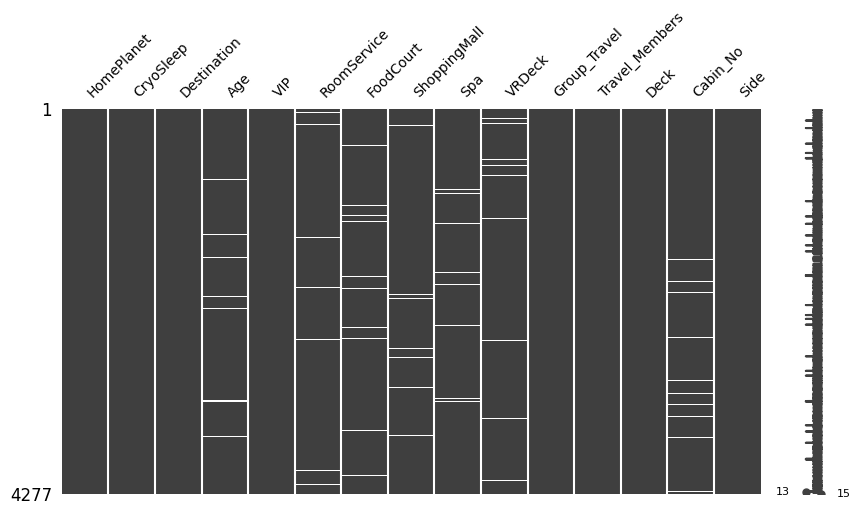

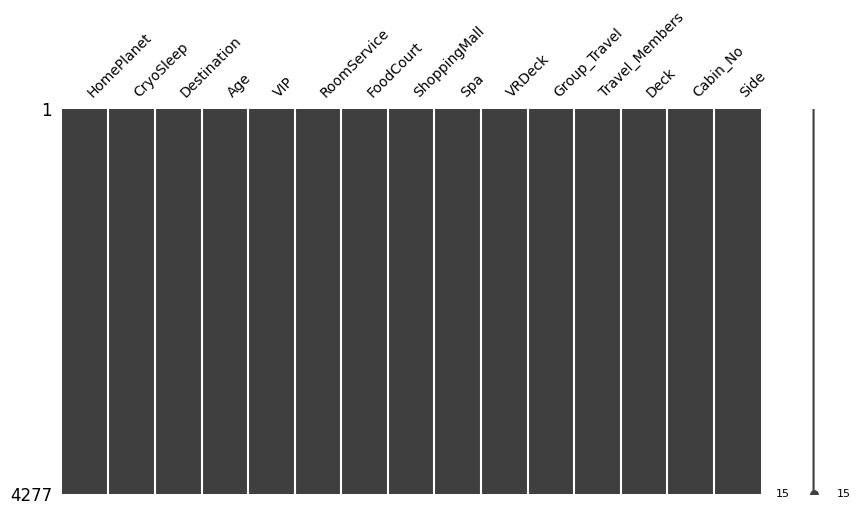

In [ ]:
# Processing the test data file
test_data = pd.read_csv(test_csv_path)
test_df = processing(test_data, 'Testing')
test_df.info()

In [ ]:
# Use of AutoML
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster locally
h2o.init()
response = "Transported"
predictors = list(train_df.drop('Transported', axis=1).columns)
train_df['Transported'] = train_df['Transported'].astype('bool')

# Convert from a pandas dataframe to an h20 dataframe
hf = h2o.H2OFrame(train_df)
# Obtaining the training and testing split
train, test = hf.split_frame(seed=1, ratios=[0.80])  #80:20 split

aml = H2OAutoML(max_models=10, max_runtime_secs=180, seed=1, include_algos= ["GLM", "DRF", "XGBoost"])
# Train the model
aml.train(x=predictors, y=response, training_frame=train)
leaderboard = aml.leaderboard.as_data_frame()
best_model_id = leaderboard['model_id'].iloc[0]
best_model = h2o.get_model(best_model_id)

# # Specify the path to save the model
save_path = h2o.save_model(model=best_model, path="./best_model", force=True)
print(f"Model saved to: {save_path}")


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp41f6sb26
  JVM stdout: /tmp/tmp41f6sb26/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp41f6sb26/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.4
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_unknownUser_hsdvtr
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model saved to: /content/best_model/XGBoost_3_AutoML_1_20240713_120200


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
best_model_id

'XGBoost_3_AutoML_1_20240713_120200'

In [ ]:
# Display leaderboard
leaderboard

model_id       auc   logloss  \
0               XGBoost_3_AutoML_1_20240713_120200  0.896027  0.398391   
1  XGBoost_grid_1_AutoML_1_20240713_120200_model_3  0.895837  0.398819   
2  XGBoost_grid_1_AutoML_1_20240713_120200_model_2  0.895199  0.402473   
3  XGBoost_grid_1_AutoML_1_20240713_120200_model_4  0.894512  0.404543   
4  XGBoost_grid_1_AutoML_1_20240713_120200_model_1  0.892664  0.408532   
5               XGBoost_1_AutoML_1_20240713_120200  0.889937  0.413370   
6               XGBoost_2_AutoML_1_20240713_120200  0.888887  0.419433   
7                   DRF_1_AutoML_1_20240713_120200  0.883466  0.444846   
8                   GLM_1_AutoML_1_20240713_120200  0.878477  0.434615   
9                   XRT_1_AutoML_1_20240713_120200  0.873100  0.481833   

      aucpr  mean_per_class_error      rmse       mse  
0  0.909250              0.203751  0.360999  0.130320  
1  0.909102              0.203549  0.361388  0.130602  
2  0.909895              0.201802  0.363005  0.131773  
3  0.909550              0.207718  0.364225  0.132660  
4  0.907861              0.201294  0.364921  0.133167  
5  0.905211              0.210273  0.367097  0.134761  
6  0.904981              0.201748  0.369216  0.136321  
7  0.897469              0.208933  0.371133  0.137740  
8  0.888620              0.207858  0.376756  0.141945  
9  0.884458              0.208765  0.392648  0.154172

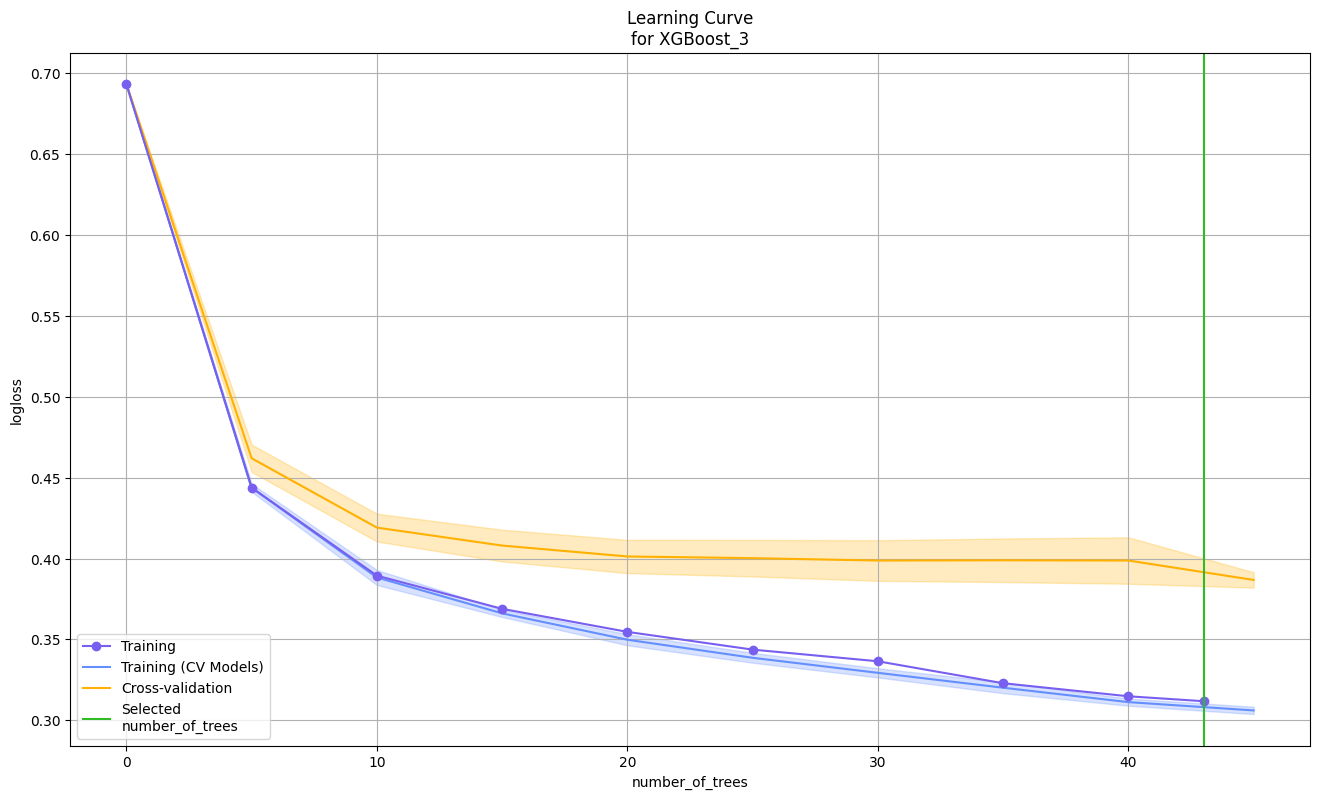

In [ ]:
# Learning Curve
learning_curve_plot = best_model.learning_curve_plot()

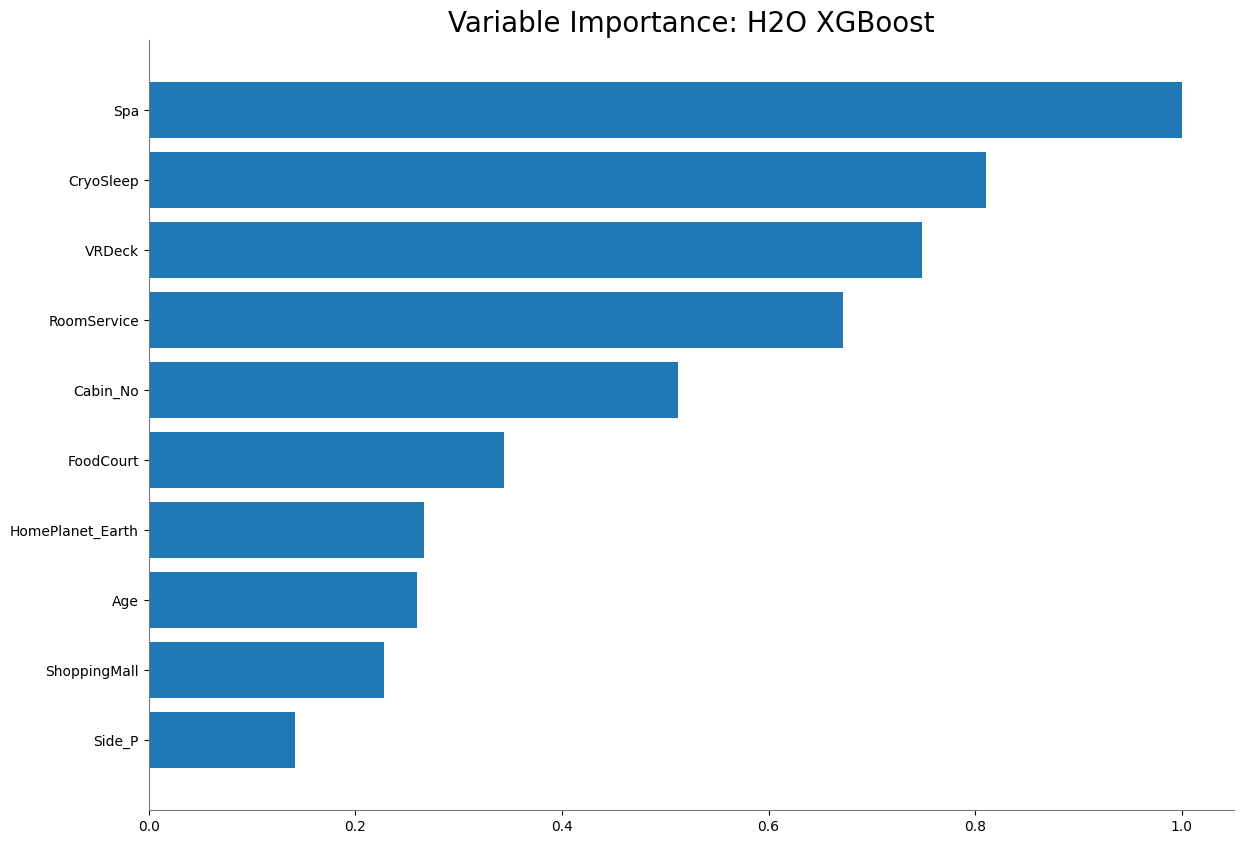

<Figure size 640x480 with 0 Axes>

In [ ]:
# Variable importance heatmap
best_model.varimp_plot()

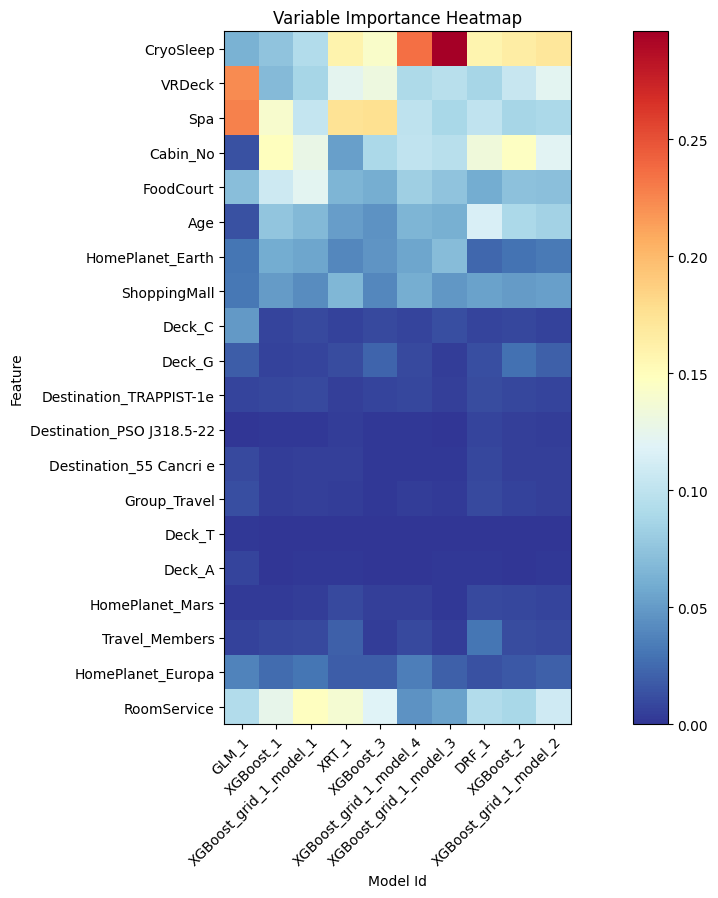

In [ ]:
# Variable importance heatmap
va_plot = aml.varimp_heatmap()

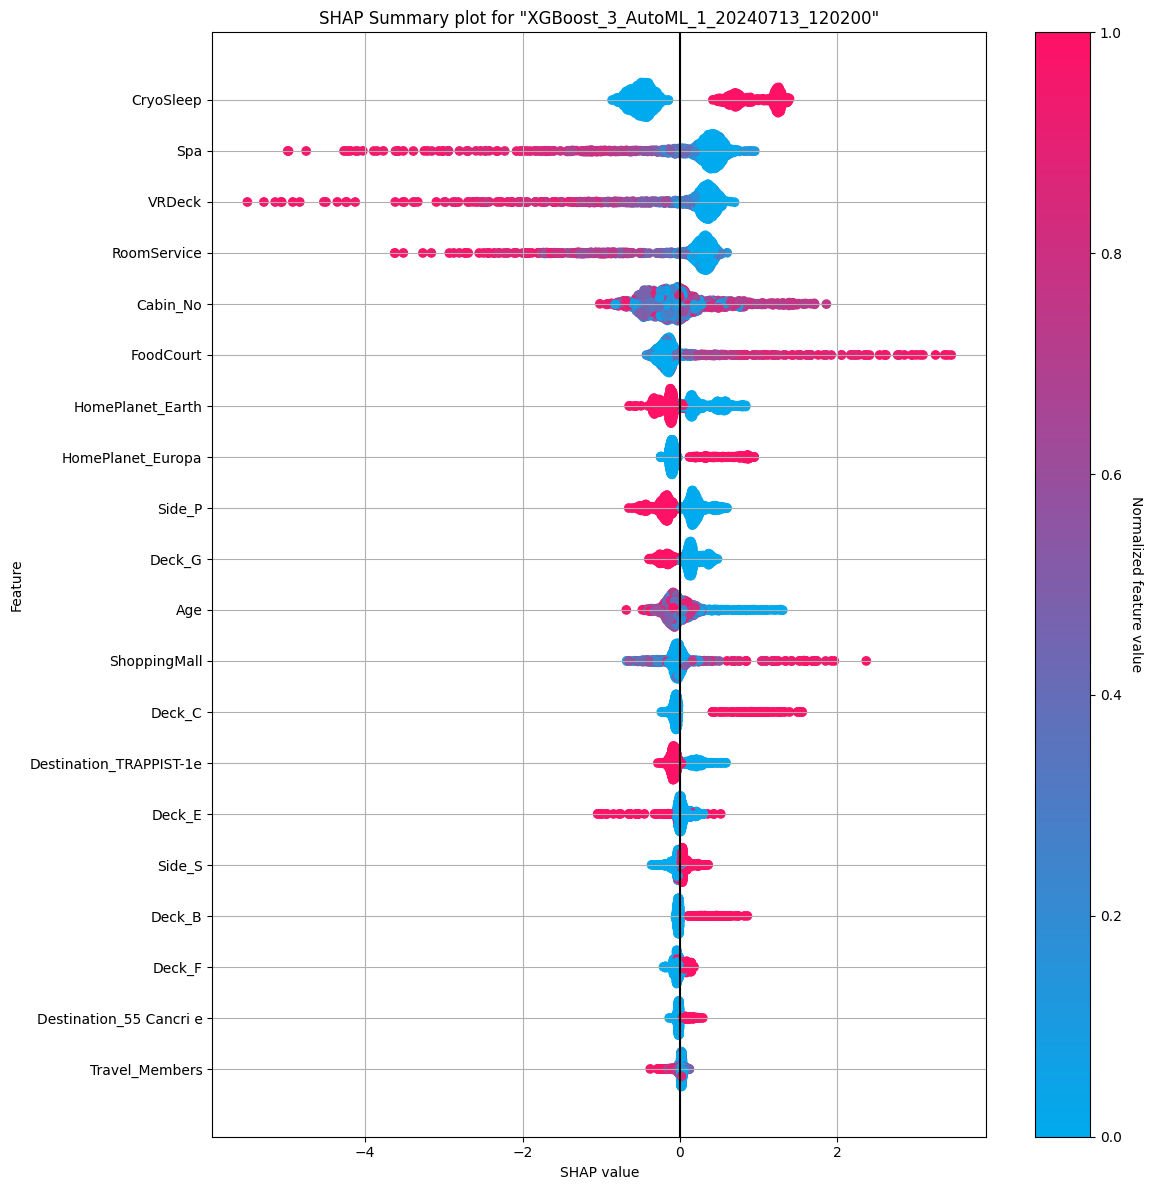

In [ ]:
#SHAP Summary
shap_plot = best_model.shap_summary_plot(train)

### 3.1 Best Model Evaluation

In [ ]:
# Best Model Evaluation
from sklearn.metrics import accuracy_score, classification_report  # Import other metrics as needed

# Evaluate on the test set
pred = best_model.predict(test)
pred = pred.as_data_frame()['predict'].values  # Convert to numpy array or list if needed
actuals = test[response].as_data_frame().values.flatten()  # Convert actuals to numpy array or list

# Example of classification metrics
accuracy = accuracy_score(actuals, pred)
report = classification_report(actuals, pred)

print(f"Accuracy on test set: {accuracy}")
print(f"Classification report:\n{report}")

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Accuracy on test set: 0.8041836141778036
Classification report:
              precision    recall  f1-score   support

       False       0.85      0.74      0.79       862
        True       0.77      0.86      0.81       859

    accuracy                           0.80      1721
   macro avg       0.81      0.80      0.80      1721
weighted avg       0.81      0.80      0.80      1721



/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


### 3.2 Making predictions on the full test
The results are saved in a csv file for submission.

In [ ]:
from google.colab import files

# Make predictions
test_h20= h2o.H2OFrame(test_df)
predictions = best_model.predict(test_h20).as_data_frame()
DF= pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': predictions['predict']})
DF.to_csv('initial_results.csv', index=False)

#Download the .csv file
files.download("initial_results.csv")
DF.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

In [ ]:
DF.shape

(4277, 2)

# Section 4: Visualising training data using principal components obtained from PCA
This can be run independently.
Here, the null values are removed from the training set prior to PCA Analysis

In [ ]:
def processing(df, flag):
  print(f'--------------- Processing {flag} data -----------------')
  # Obtaining 'Group_Travel' and 'Travel_Memebrs' features from 'Group_ID'
  df['GroupId'] = df['PassengerId'].str.split('_').str[0]
  df['GroupId'] = pd.to_numeric(df['GroupId'])
  df['MemberId'] = df['PassengerId'].str.split('_').str[1]
  df['MemberId'] = pd.to_numeric(df['MemberId'])
  df1= df.groupby('GroupId')['MemberId'].agg('count').reset_index()  # Coverting dataframe
  df1.rename(columns={'MemberId': 'Member_Count'}, inplace=True)
  df1['Group_travel'] = (df1['Member_Count']>1).astype(int)
  Groups = df1[df1['Group_travel'] == 1]['GroupId'] #.reset_index()
  Groups = set(Groups) # Convert Groups to a set
  # Obtaining actual groups IDs with more one person.
  df['Group_Travel'] = df['GroupId'].isin(Groups)
  # Merges the dataframes on GroupId, with a left join ensuring all rows from df are kept.
  df2 = pd.merge(df, df1[['GroupId','Member_Count']], on='GroupId', how='left')

  # Rename the Member_Count column to travel_members
  df2.rename(columns={'Member_Count': 'Travel_Members'}, inplace=True)

  # Obtaining Deck, Cabin_No and Side from 'Cabin' feature
  df2[["Deck", "Cabin_No", "Side"]] = df2["Cabin"].str.split("/", expand=True)

  # Obtaining first name and surname from Name feature
  df2[['Fname', 'Surname']] = df2['Name'].str.split(" ", expand=True)
  df2['Name_length'] = df2['Fname'].str.len() + df2['Surname'].str.len()
  df2.drop(['Fname','Surname'], axis=1, inplace = True)

  df2.drop(['Name','GroupId','MemberId','Cabin'], axis=1, inplace = True)
  df2['Index'] = np.arange(df2.shape[0])
  #msno.matrix(df2,figsize=(10,5),fontsize=10)
  return df2

from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler

def imputing_data(df2):

  # Impute missing values of the categorical features
  Categories=df2.select_dtypes(include=['object']).columns
  imputer = SimpleImputer(strategy='most_frequent')
  df2[Categories] = imputer.fit_transform(df2[Categories])

  # Impute missing values of the numerical features
  Num_Features=df2.select_dtypes(include=['float']).columns
  for num_feature in Num_Features:
    #df2[num_feature].fillna(df2[num_feature].mode()[0], inplace=True)
    df2[num_feature].fillna(df2[num_feature].median(), inplace=True)

  df2['Cabin_No'] = pd.to_numeric(df2['Cabin_No'])
  return df2

def feature_transforms(df2):
  # Transform skewed features
  skewed_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  for feature in skewed_features:
    df2[feature] = np.log1p(df2[feature])  # log1p is used to handle zero values in the data

  # Normalize the numerical features
  def normalise_feature(var):
      var_min = np.min(var)
      var_max = np.max(var)
      normalised_var = (var - var_min) / (var_max - var_min)
      return normalised_var

  features_to_scale = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Cabin_No']
  for feature in features_to_scale:
    df2[feature]=normalise_feature(df2[feature])

  return df2

def feature_encoding(df2):
  # Binary encoding of features with binary output
  df2['VIP'] = df2['VIP'].astype(bool)
  df2['CryoSleep'] = df2['CryoSleep'].astype(bool)

  # Feature Encoding
  encoded_df = pd.get_dummies(df2, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], dummy_na=False)

  # bool to int
  #binary_features=encoded_df.select_dtypes(include=['bool']).columns
  #for feature in binary_features:
    #encoded_df[feature] = encoded_df[feature].astype(int)

  return encoded_df

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

train_csv_path = "https://raw.githubusercontent.com/7PAM2015-0509-2023-Team4/Kaggle-Challenge/main/train.csv"

train_data = pd.read_csv(train_csv_path)
train_df = train_data.dropna()
train_df = processing(train_df, 'Training')
train_df['Cabin_No'] = pd.to_numeric(train_df['Cabin_No'])
train_df = feature_transforms(train_df)
train_df = feature_encoding(train_df)
train_df.drop(['PassengerId','Index'], axis=1, inplace=True)
train_df.info()

--------------- Processing Training data -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6606 entries, 0 to 6605
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  6606 non-null   bool   
 1   Age                        6606 non-null   float64
 2   VIP                        6606 non-null   bool   
 3   RoomService                6606 non-null   float64
 4   FoodCourt                  6606 non-null   float64
 5   ShoppingMall               6606 non-null   float64
 6   Spa                        6606 non-null   float64
 7   VRDeck                     6606 non-null   float64
 8   Transported                6606 non-null   bool   
 9   Group_Travel               6606 non-null   bool   
 10  Travel_Members             6606 non-null   int64  
 11  Cabin_No                   6606 non-null   float64
 12  Name_length                6606 non-null   in

Text(0, 0.5, 'Principal Component 2')

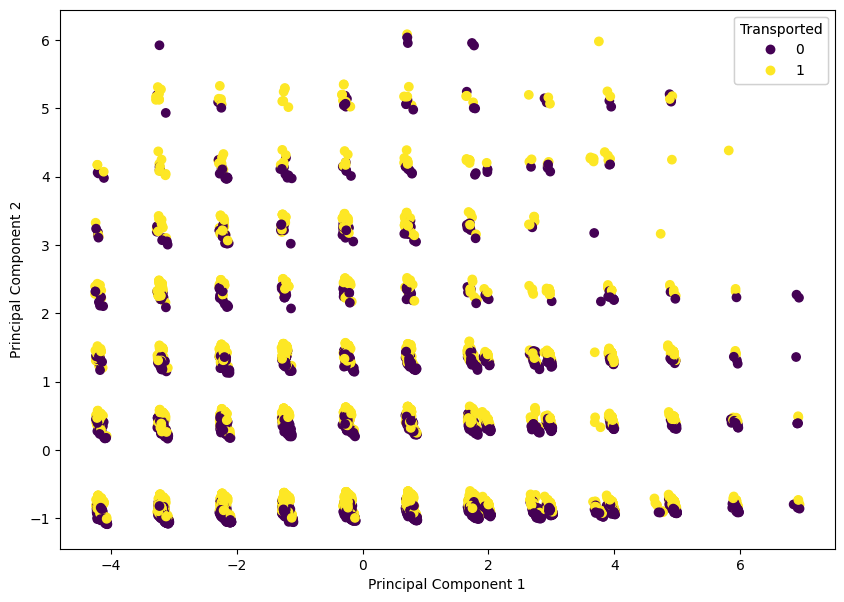

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(train_df)
target = train_df['Transported']

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the first two principal components
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pc_df['PC1'], pc_df['PC2'], c=target, cmap='viridis')  # 'c' is the color based on the target column

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Transported")
plt.gca().add_artist(legend1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')